In [1]:
import glob
import loader
import seaborn as sns
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

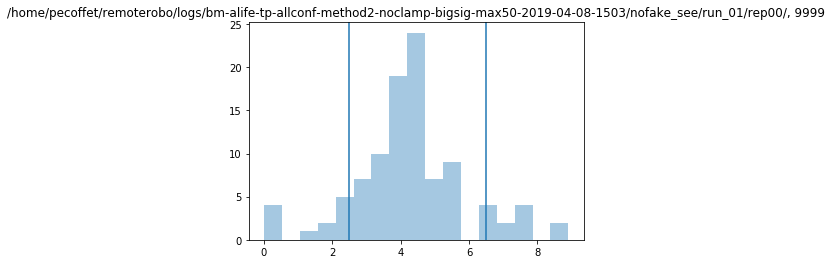

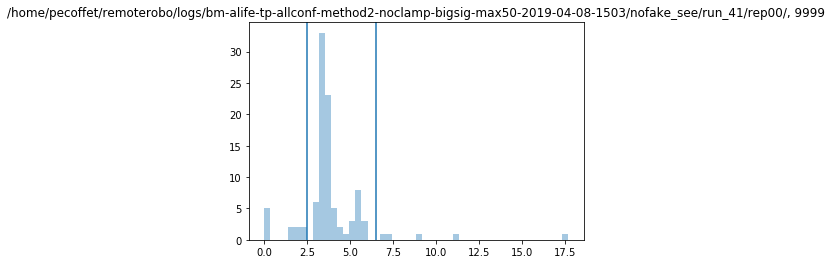

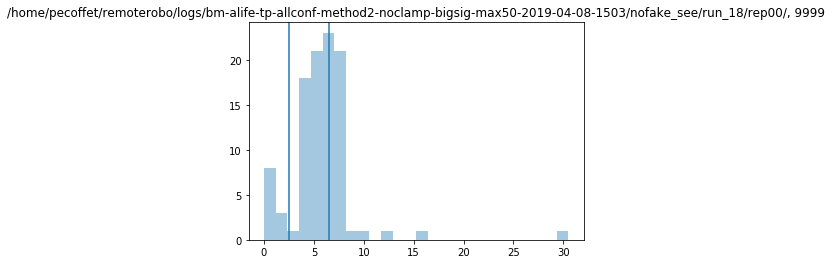

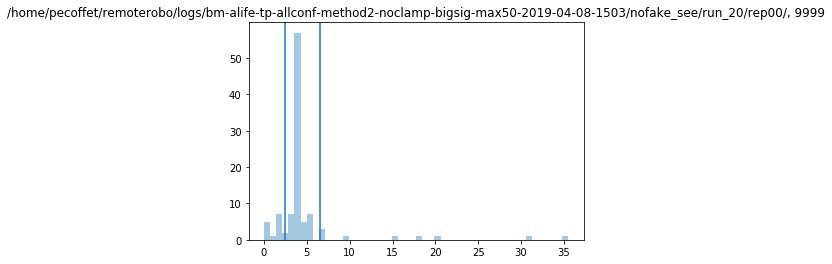

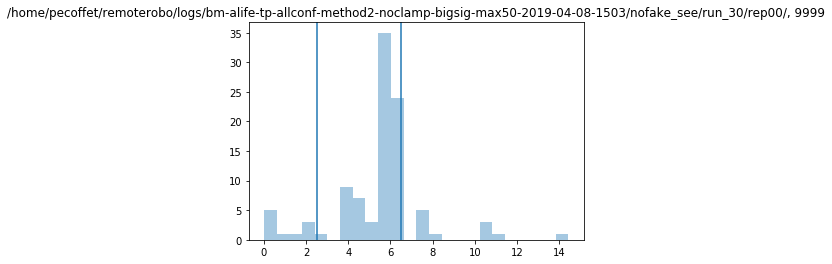

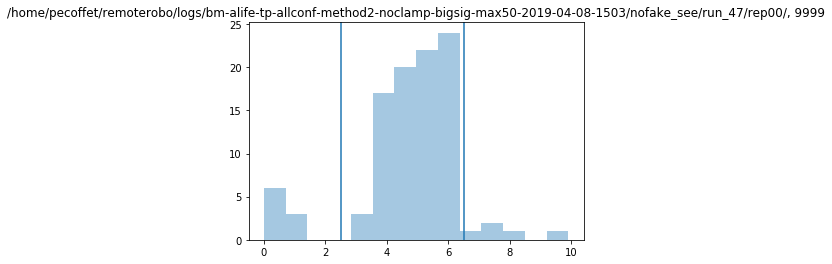

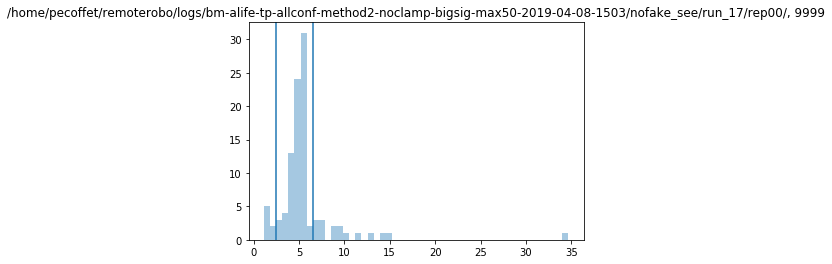

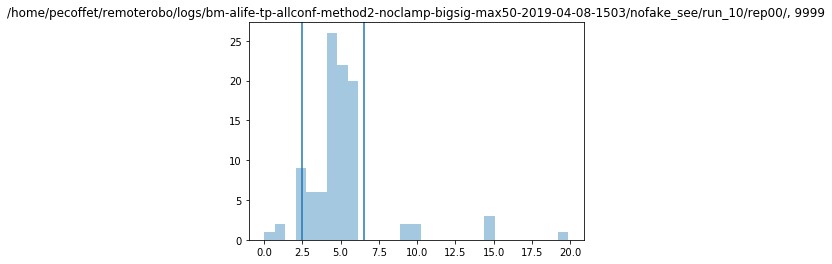

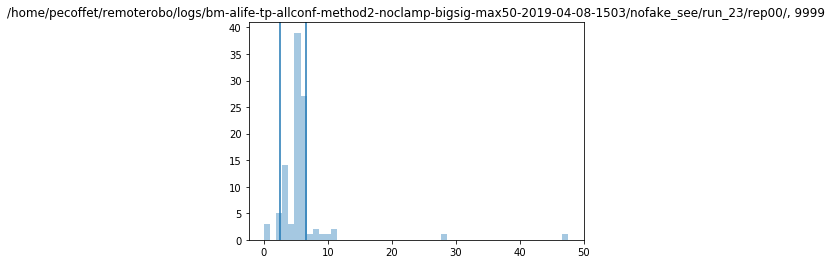

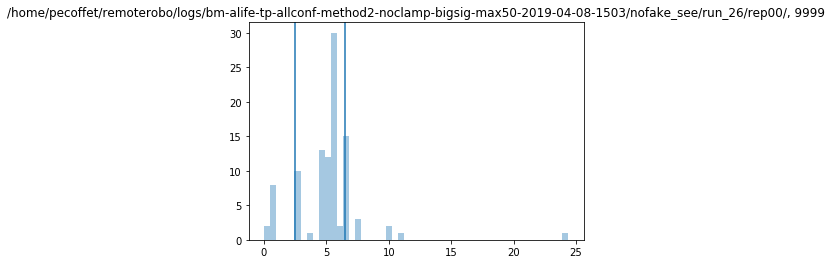

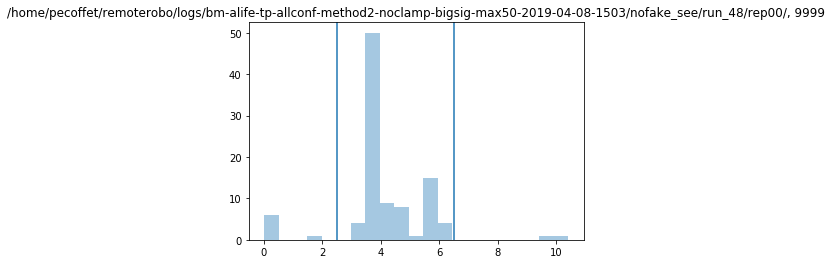

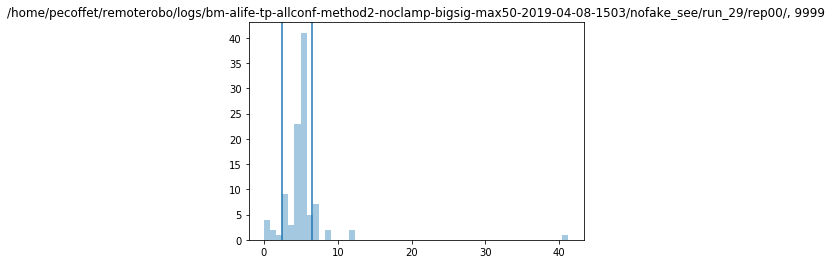

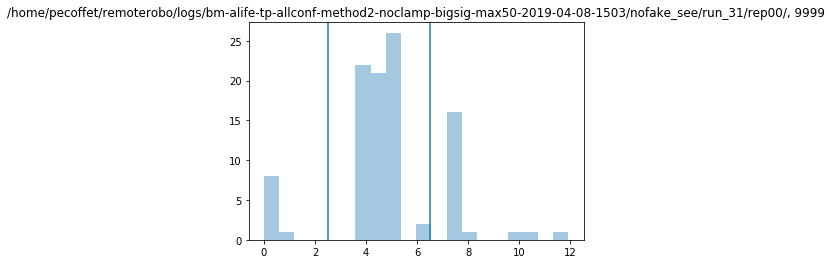

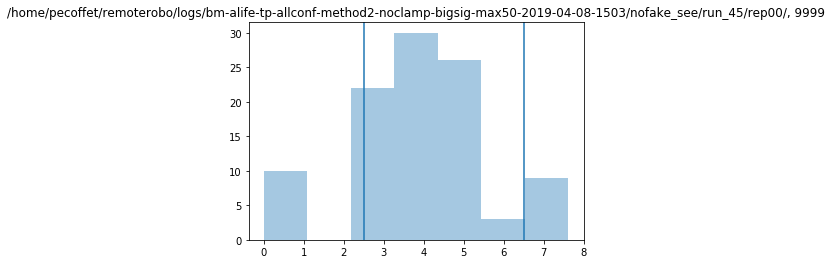

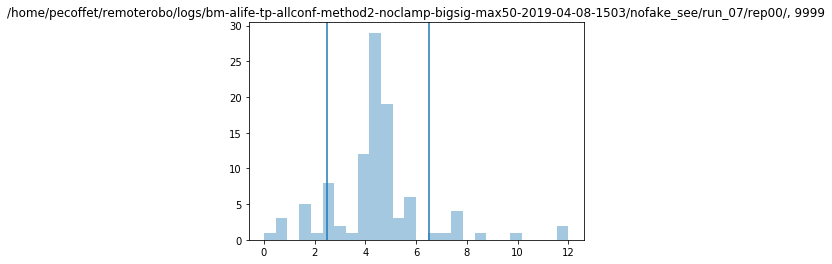

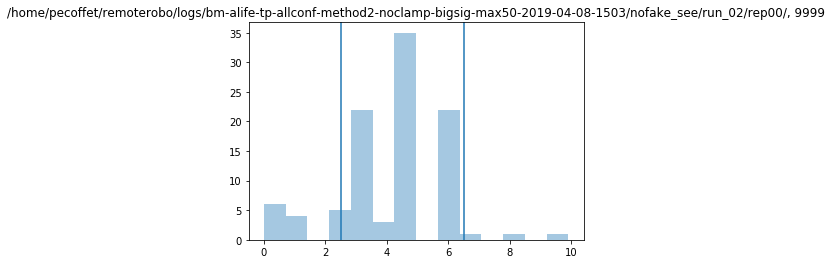

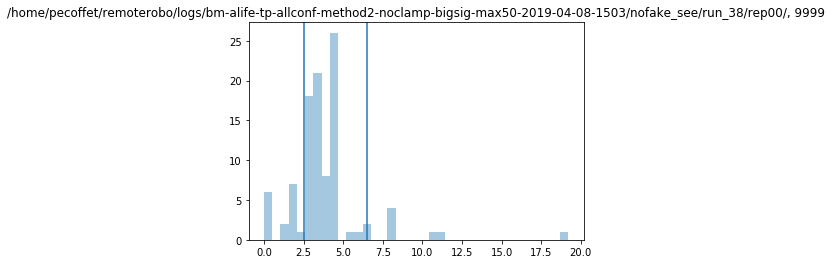

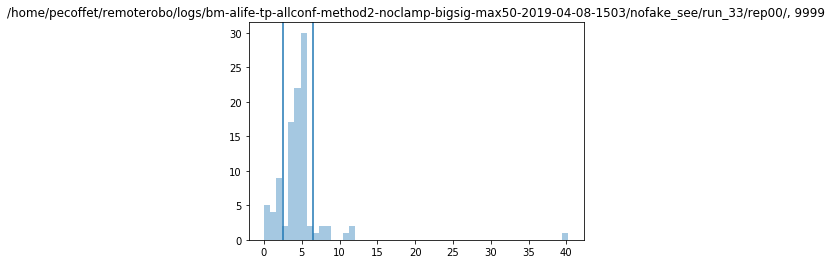

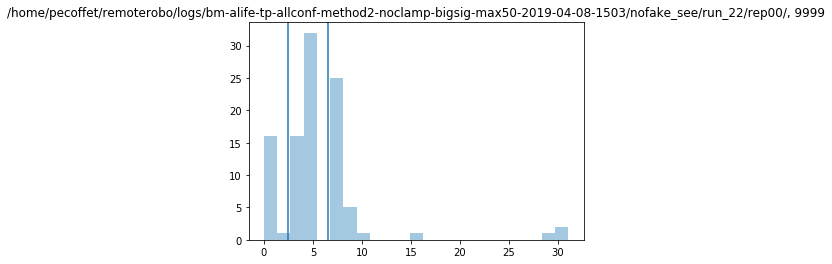

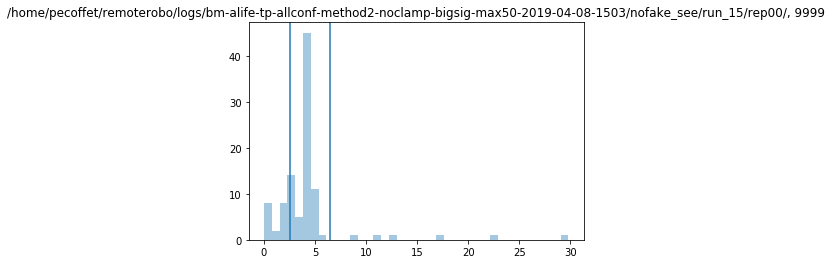

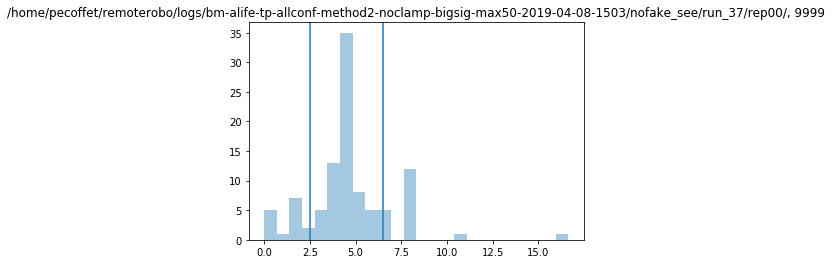

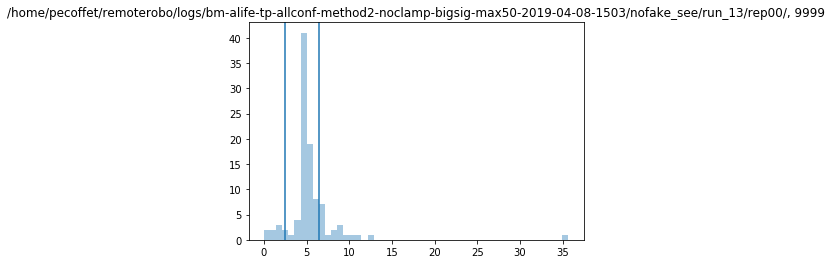

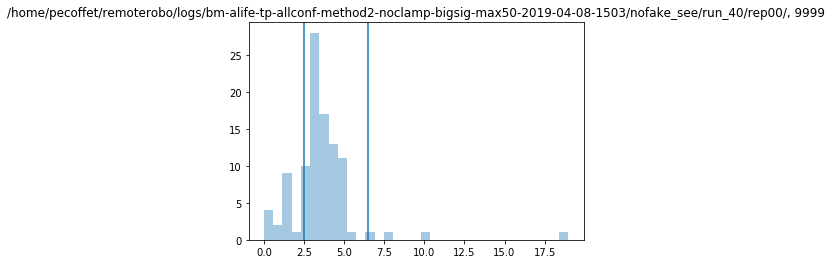

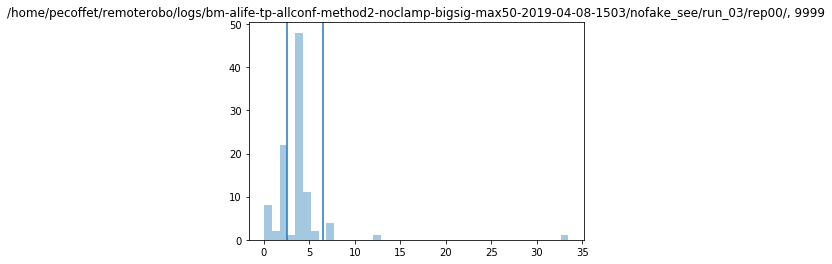

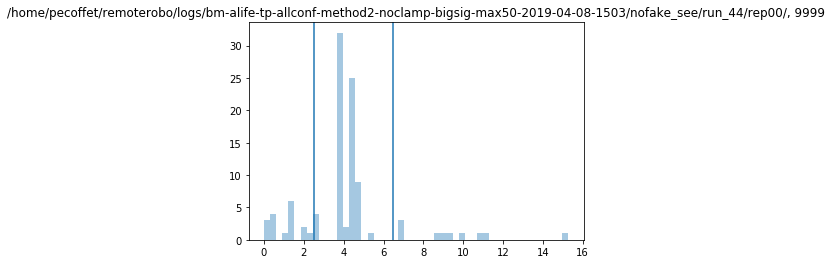

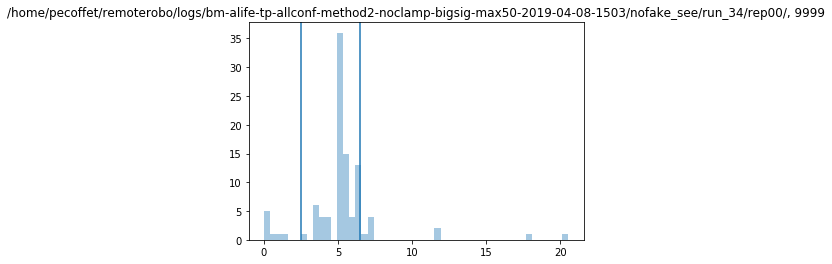

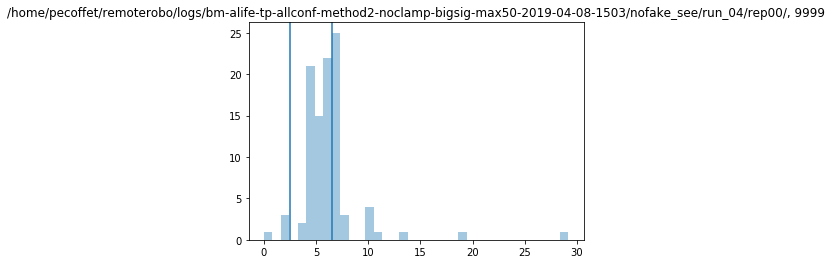

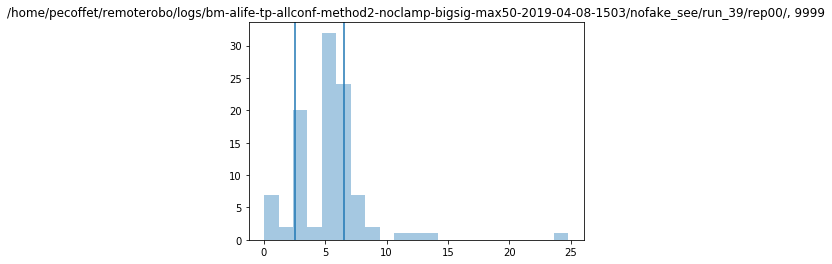

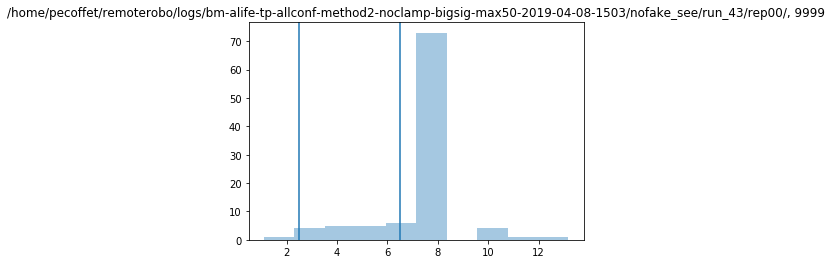

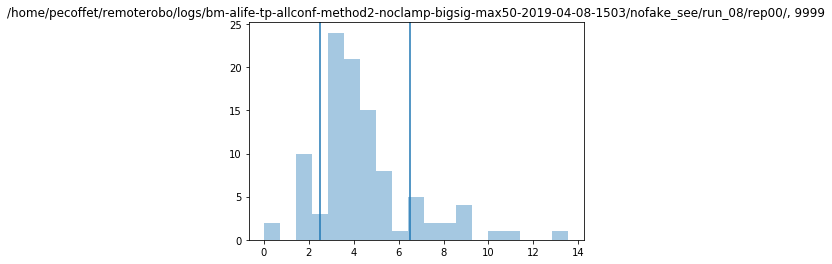

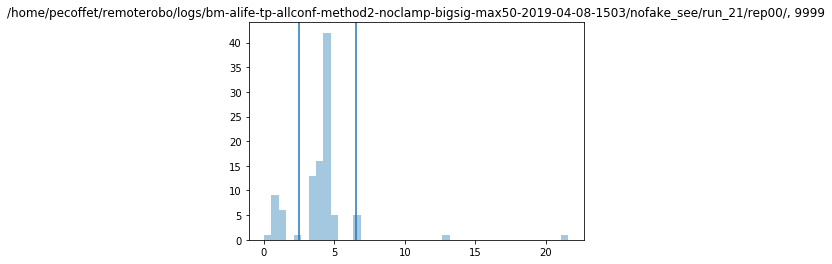

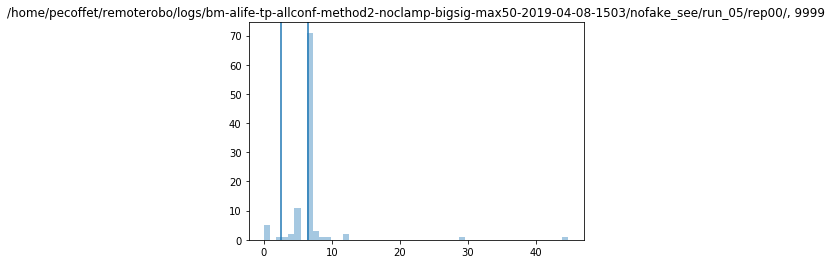

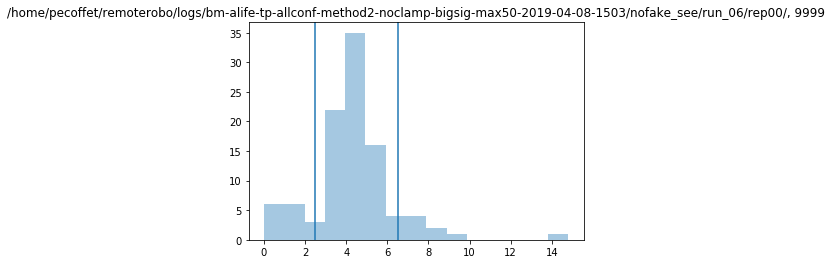

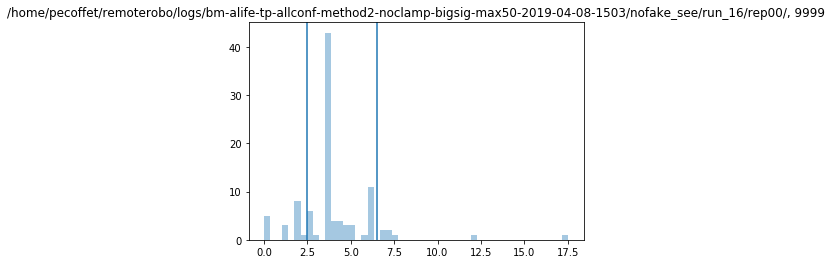

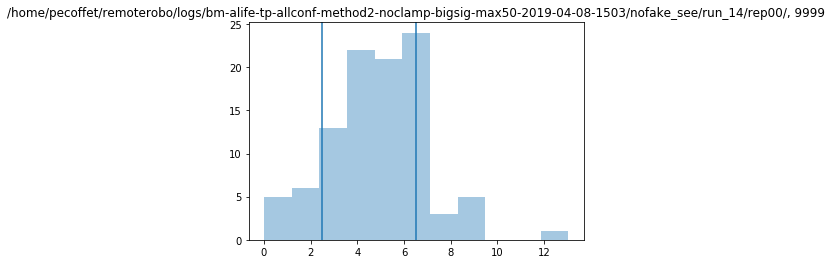

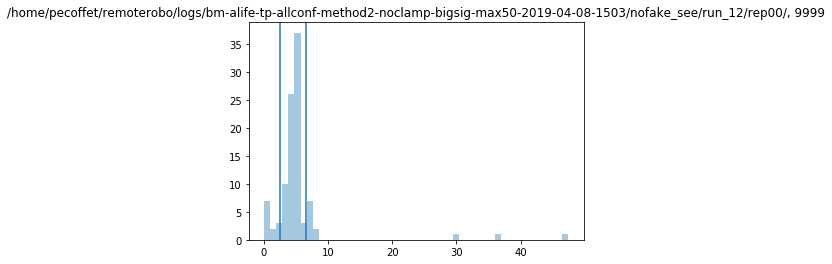

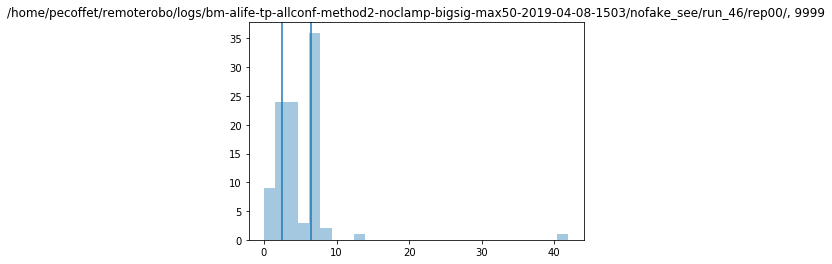

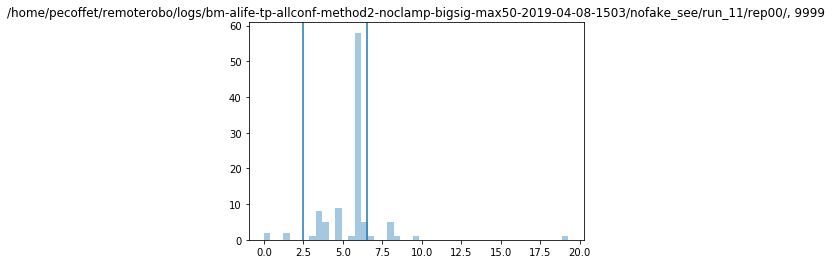

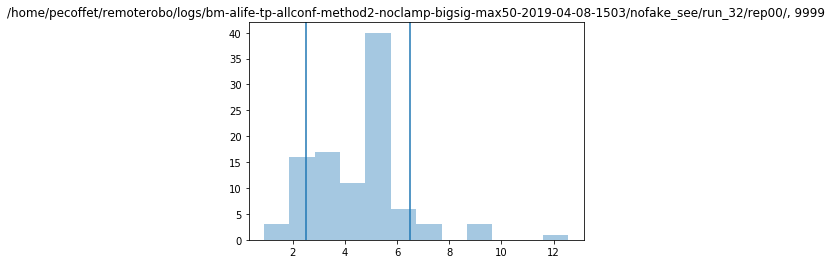

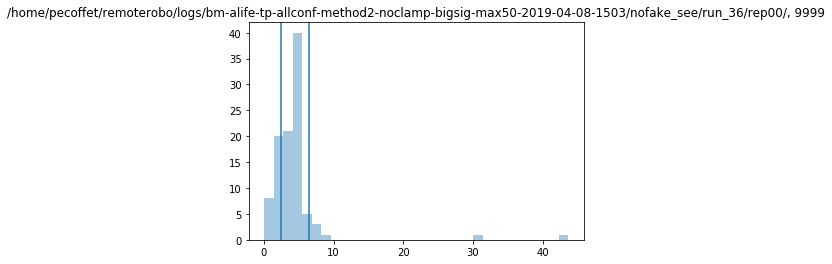

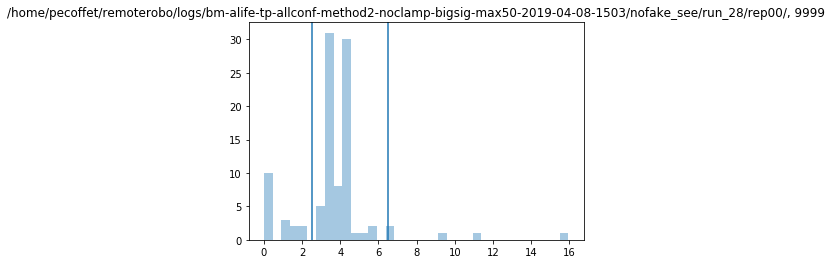

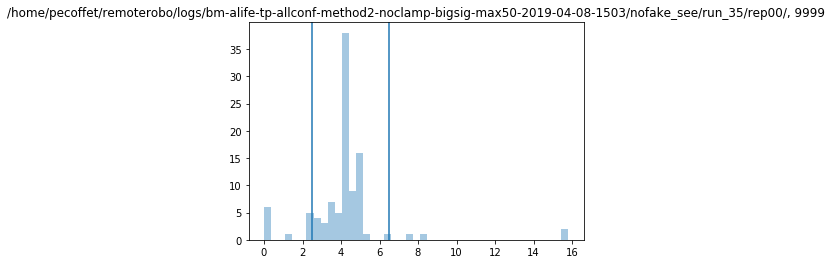

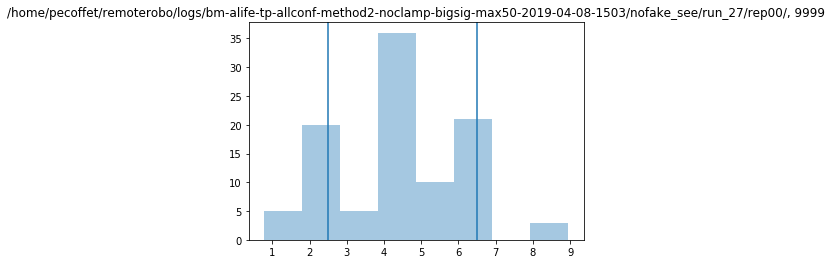

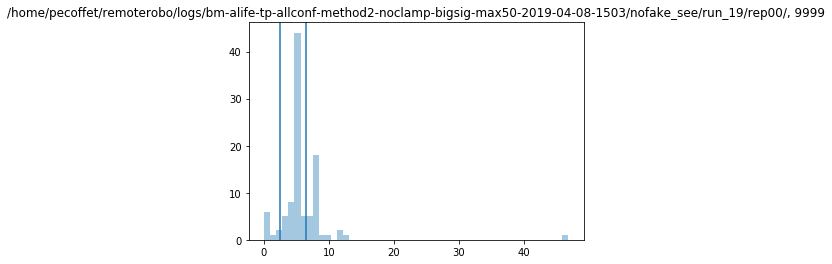

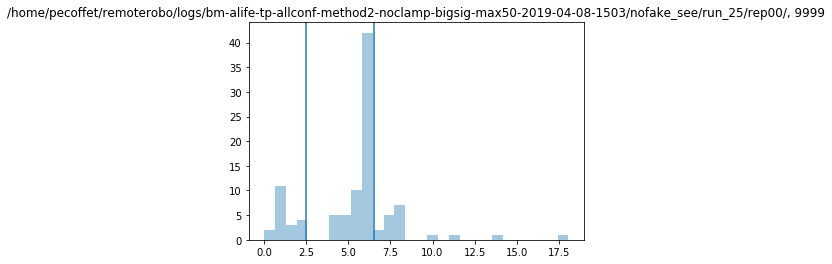

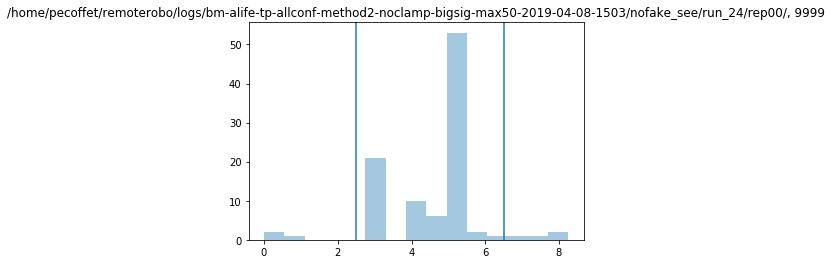

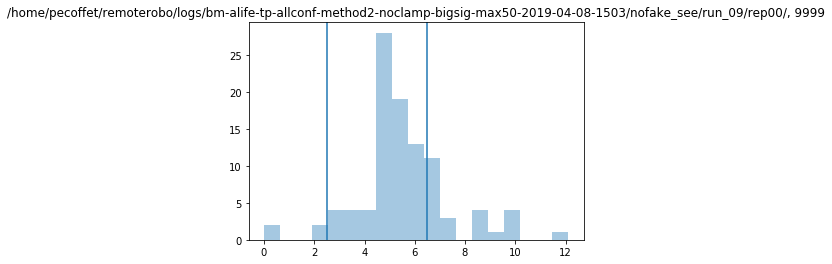

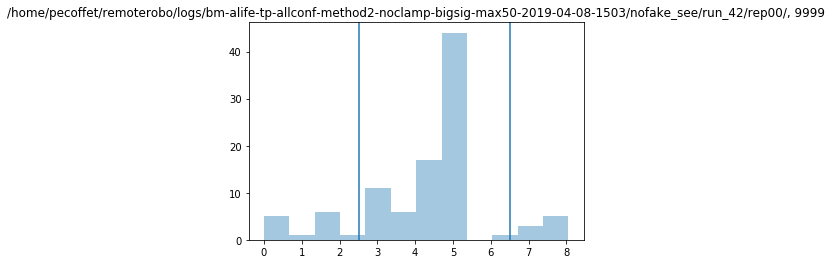

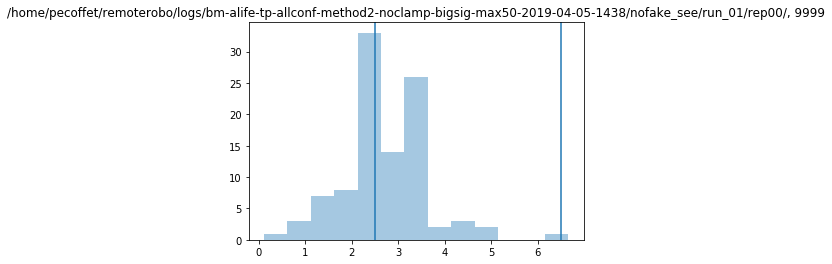

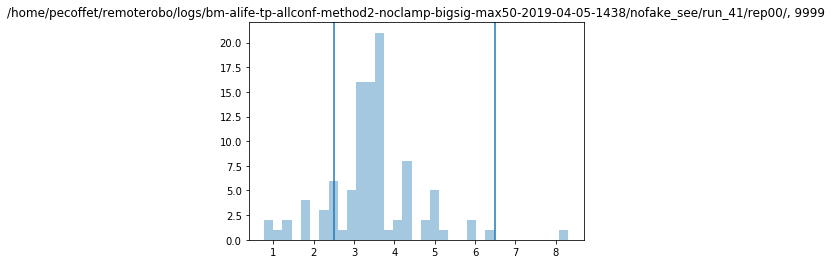

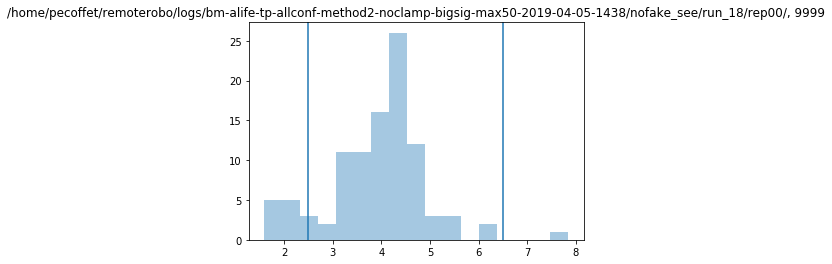

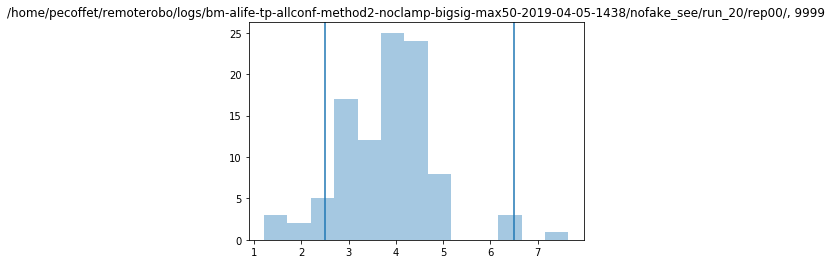

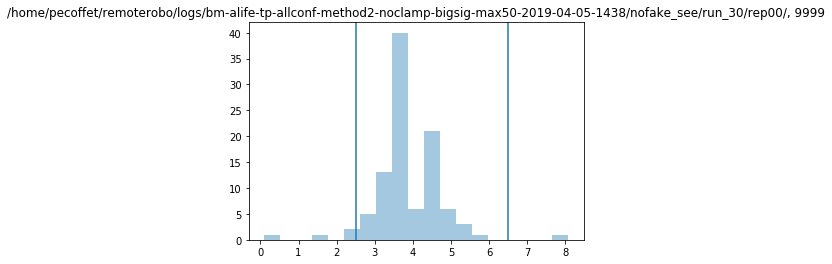

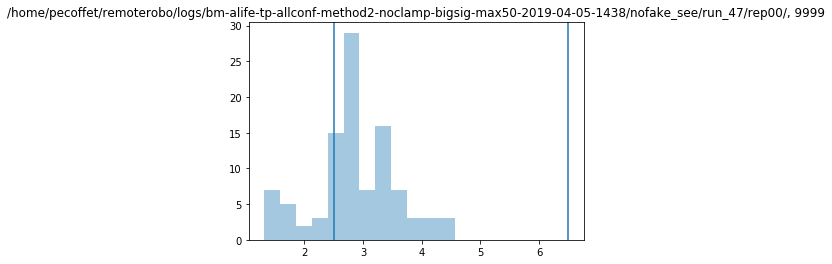

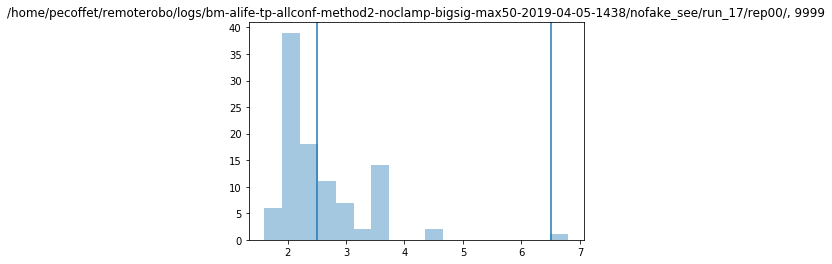

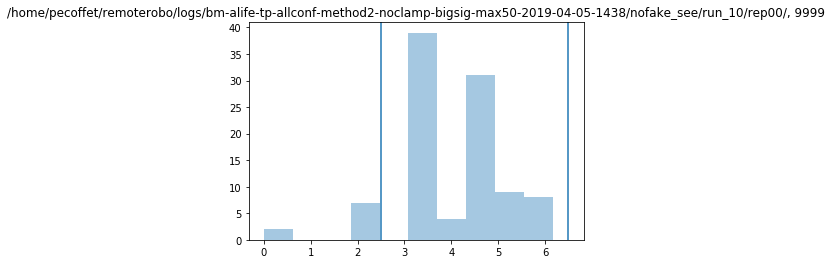

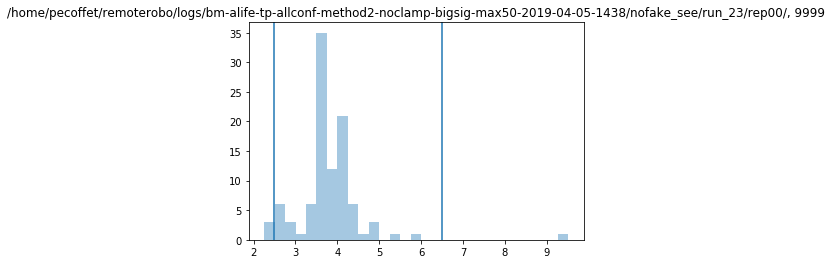

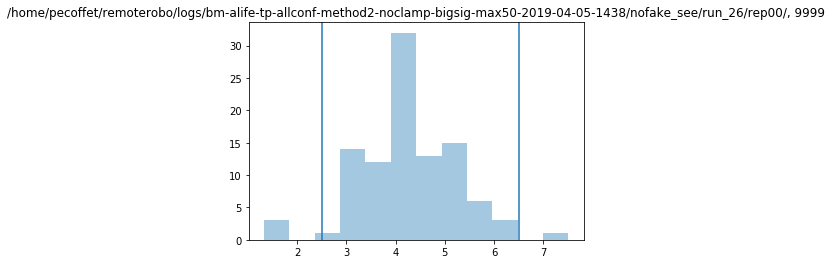

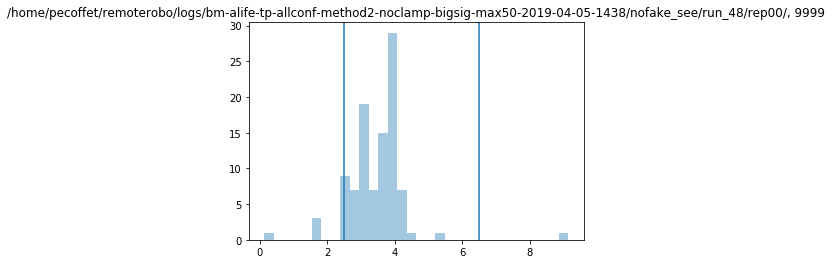

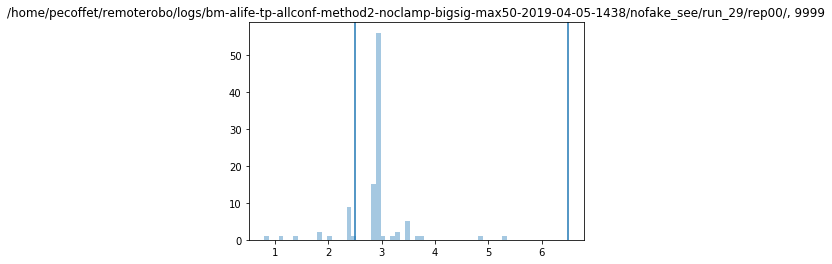

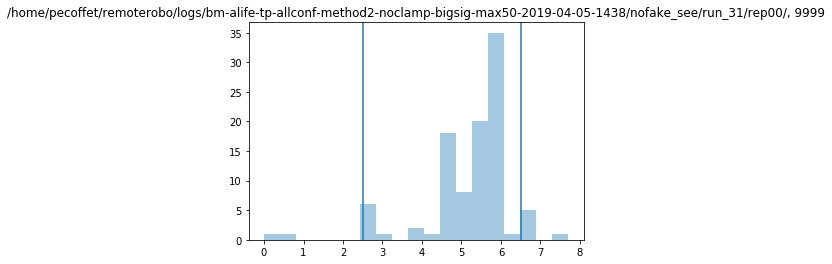

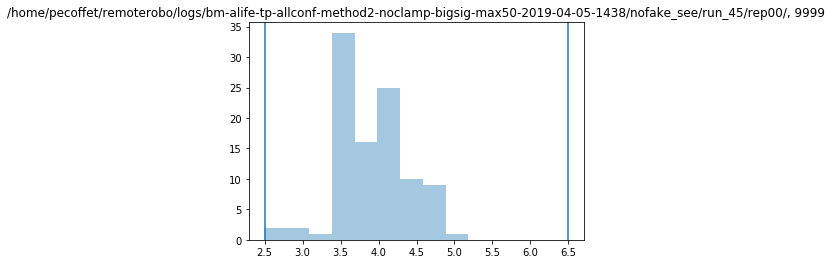

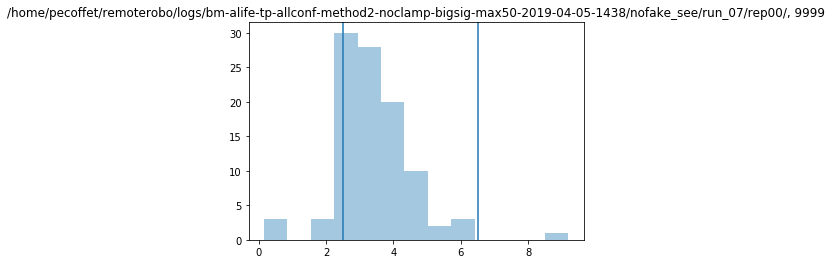

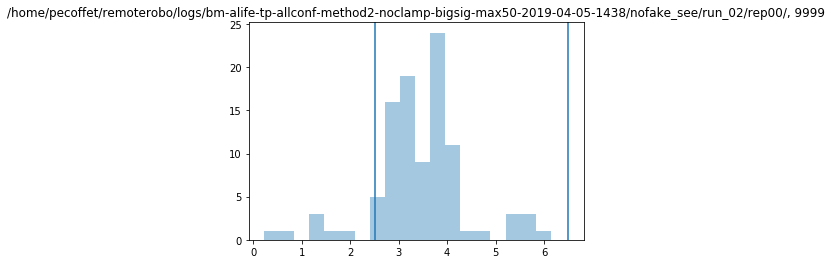

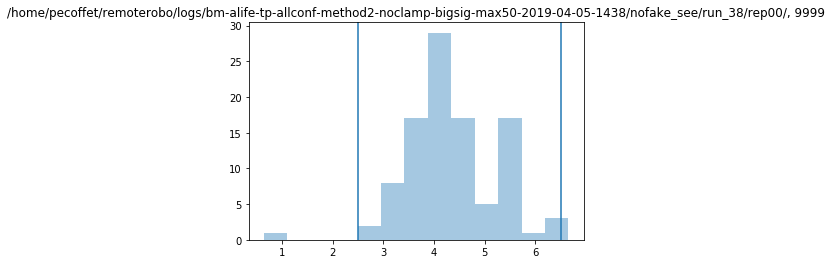

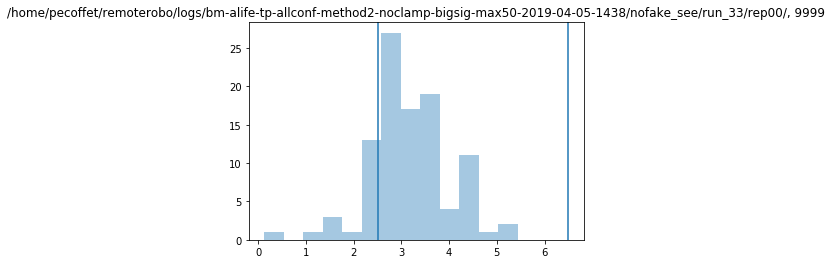

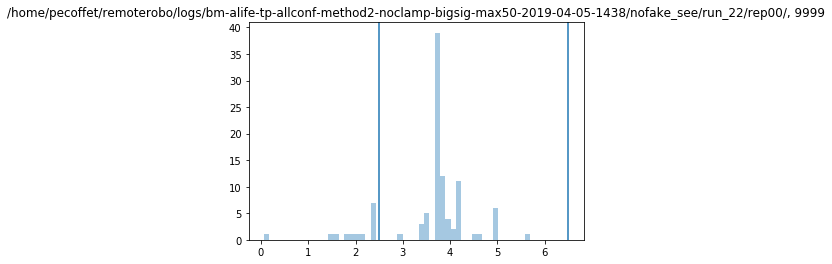

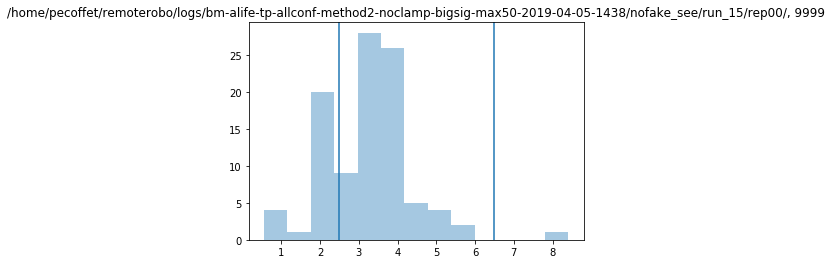

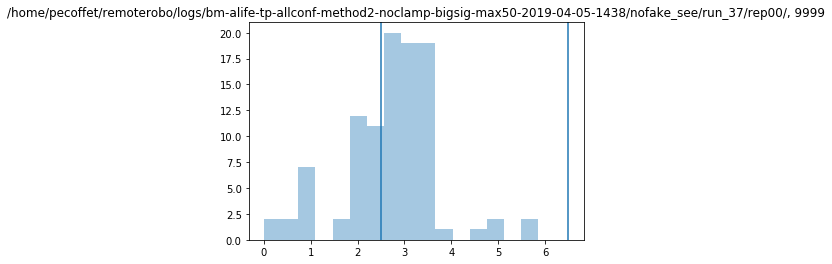

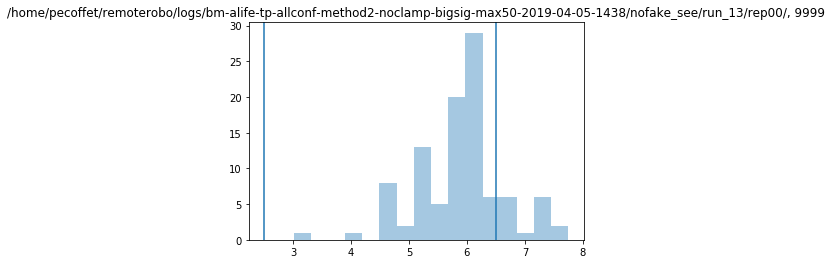

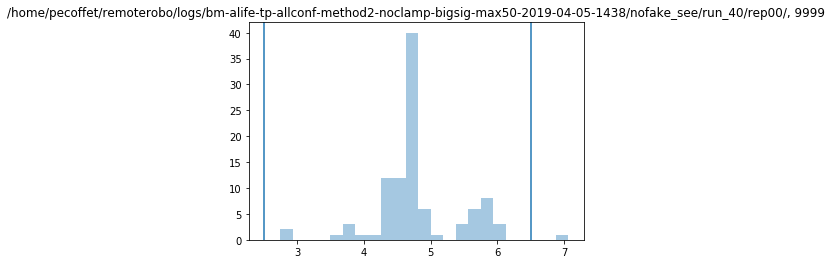

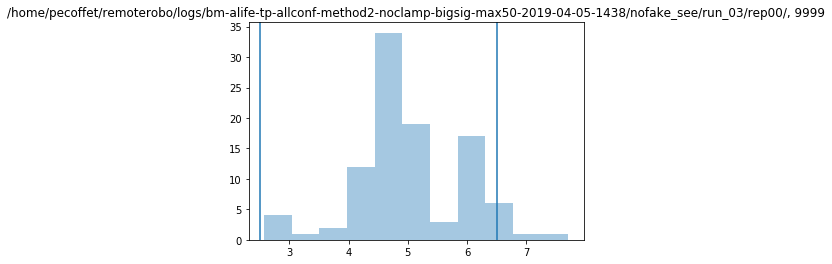

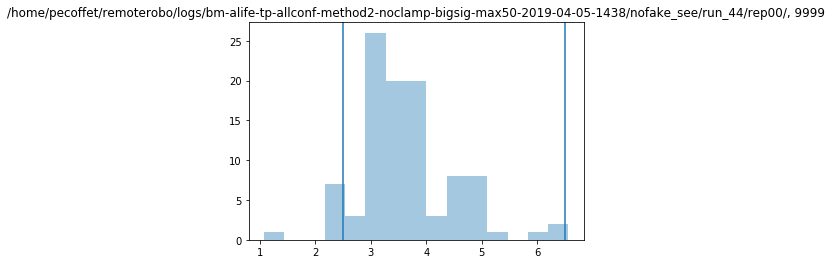

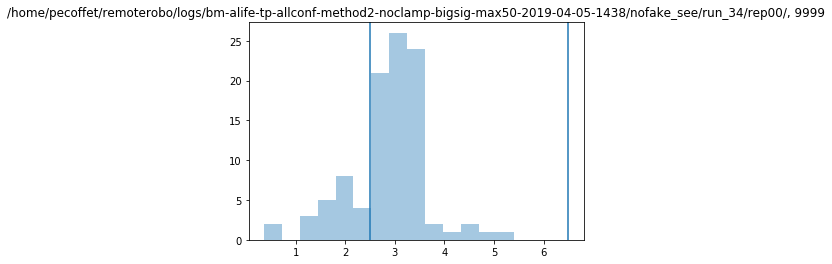

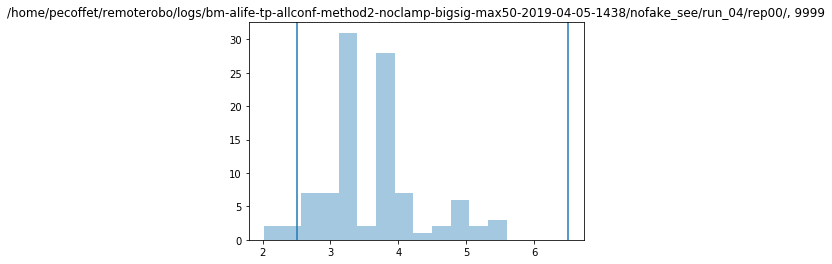

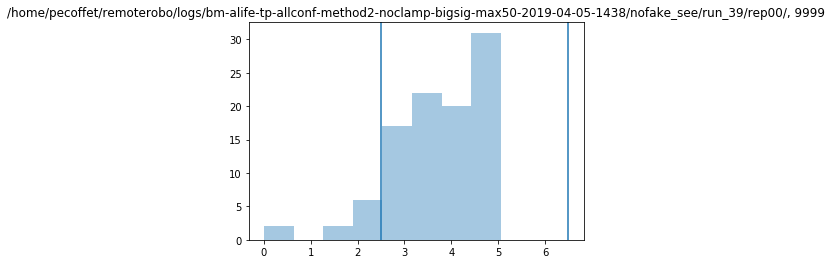

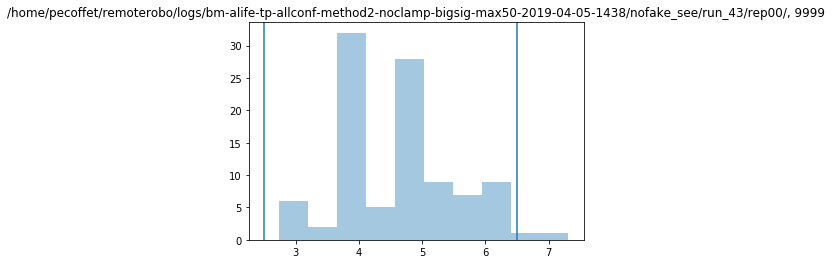

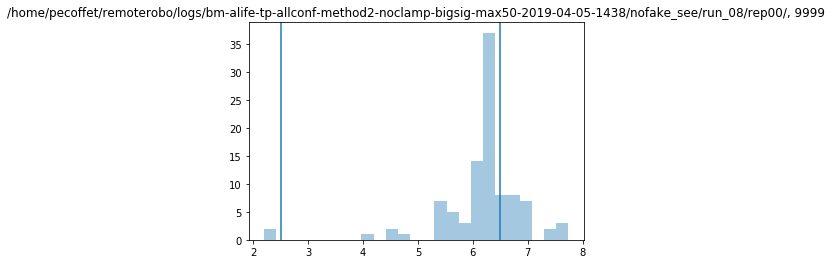

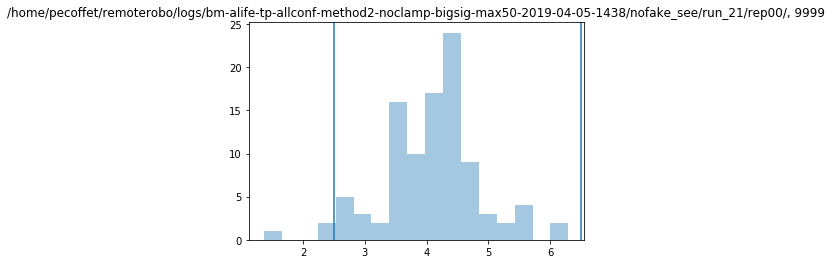

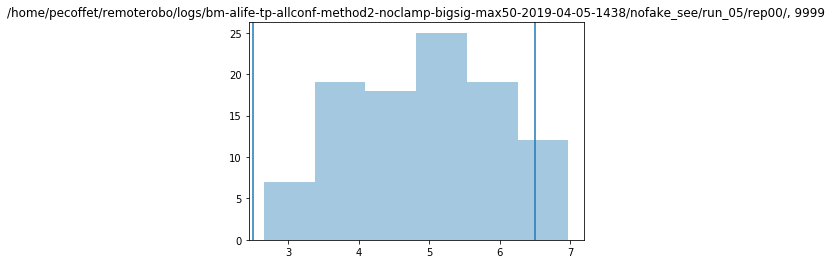

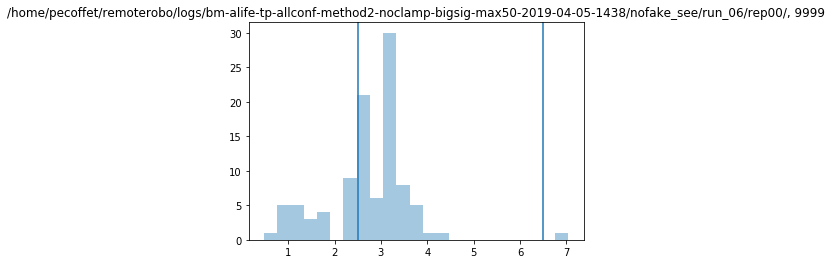

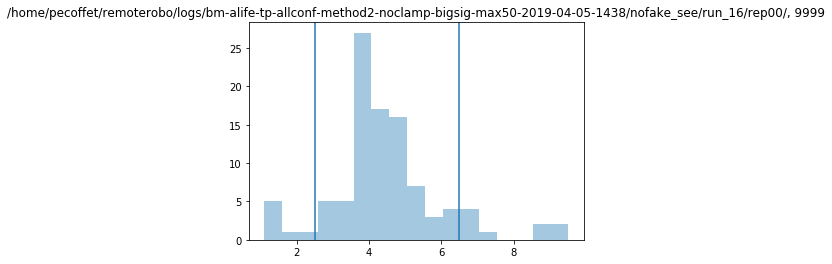

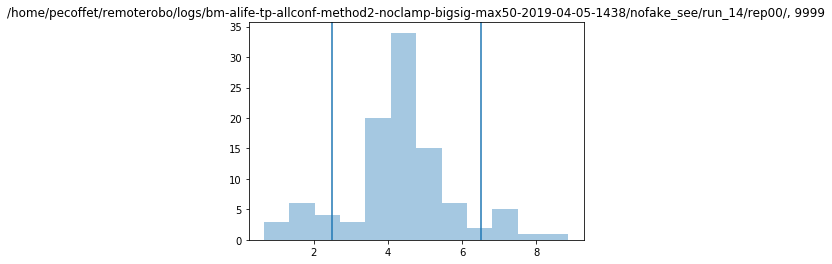

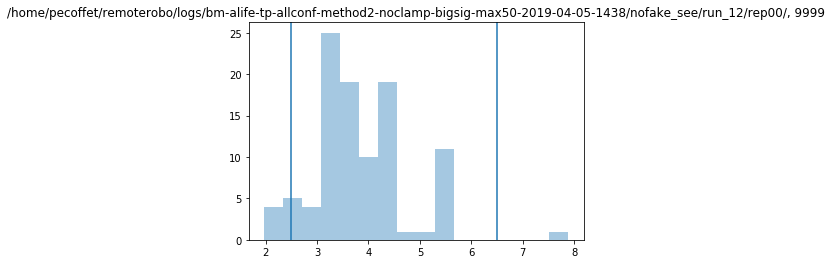

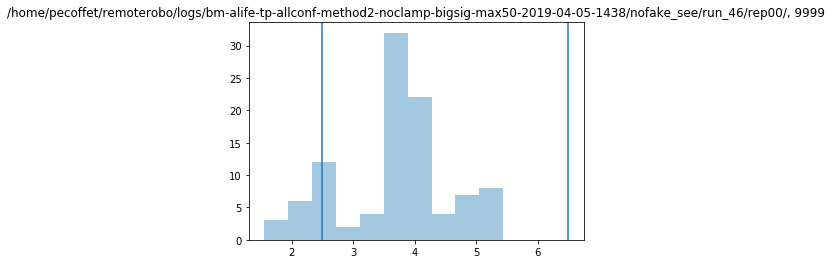

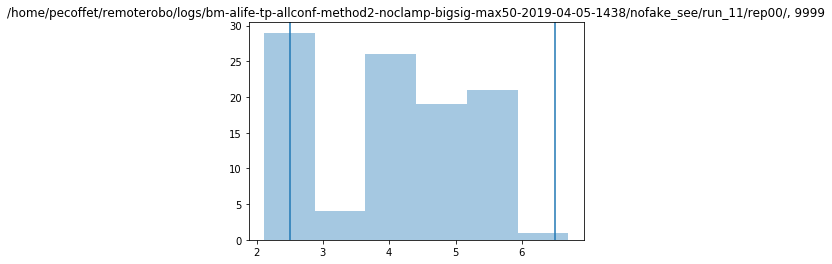

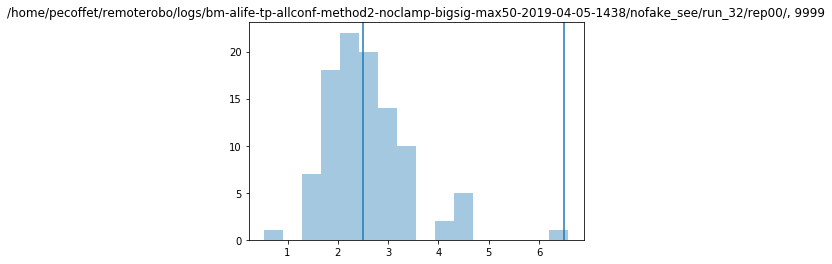

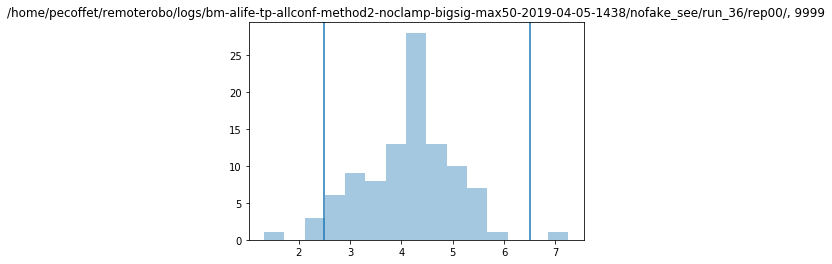

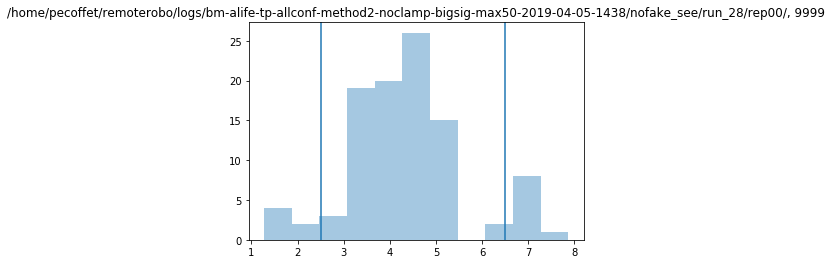

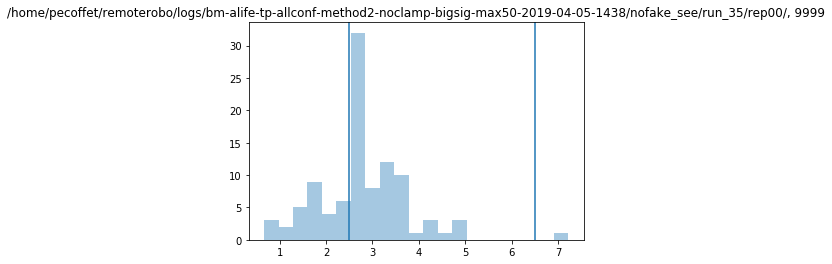

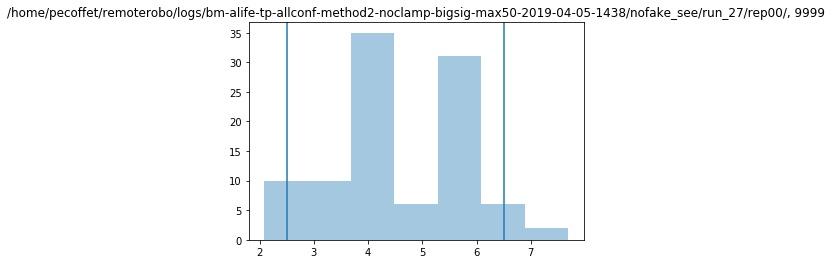

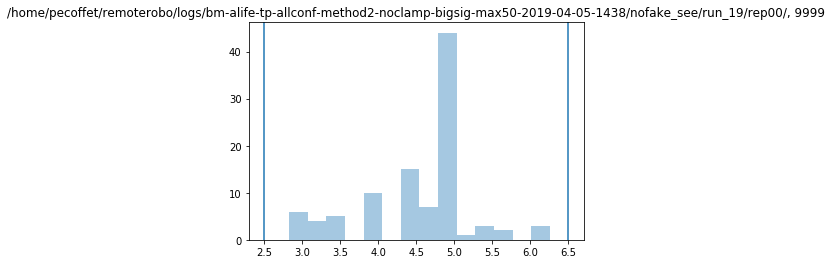

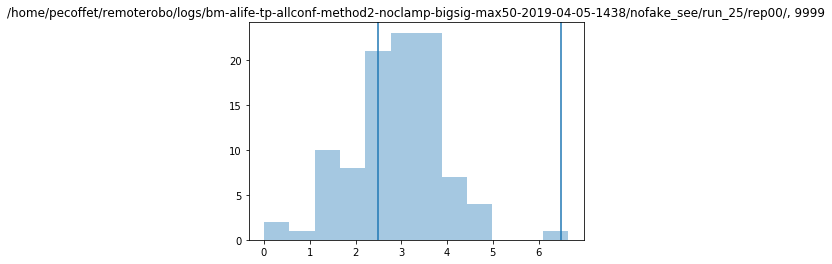

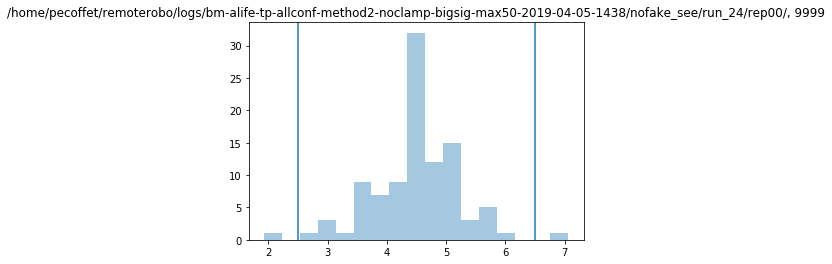

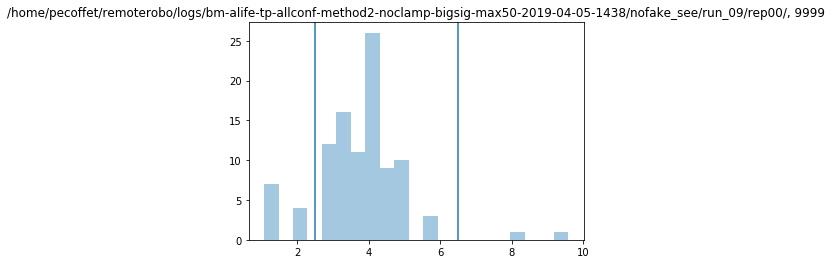

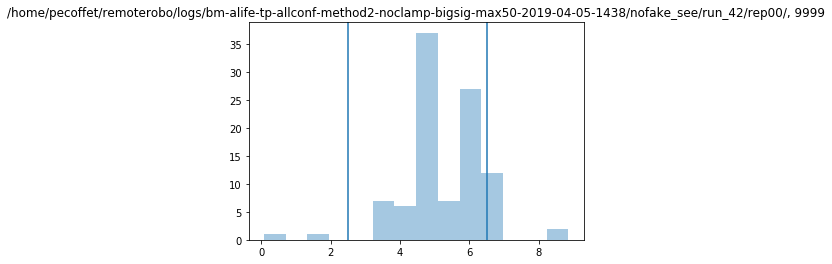

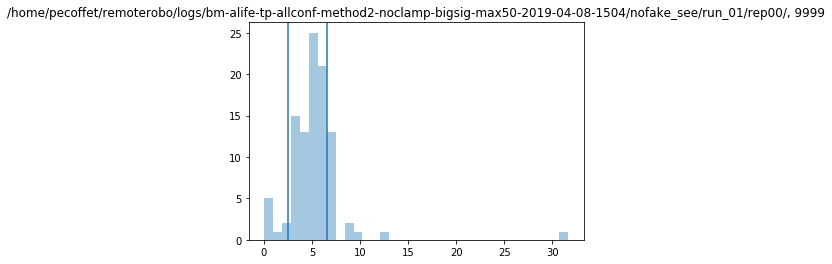

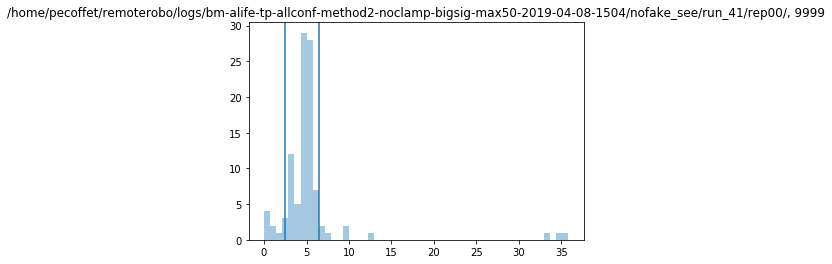

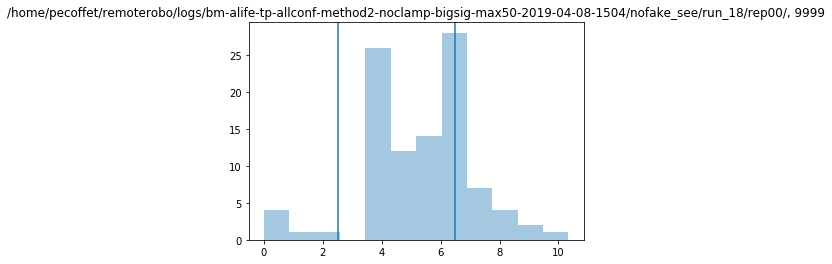

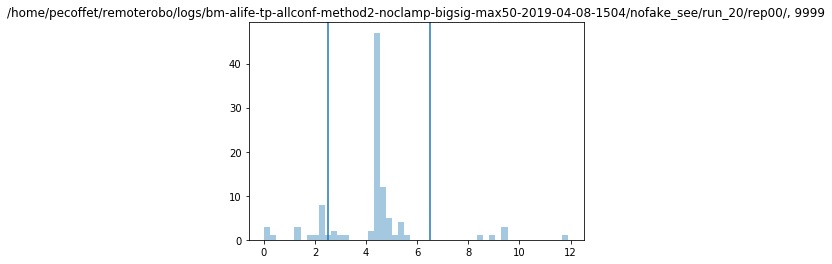

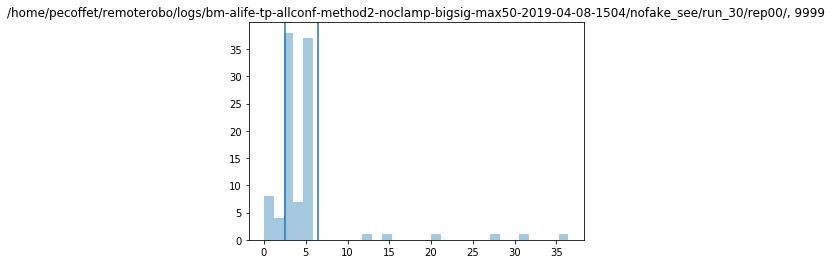

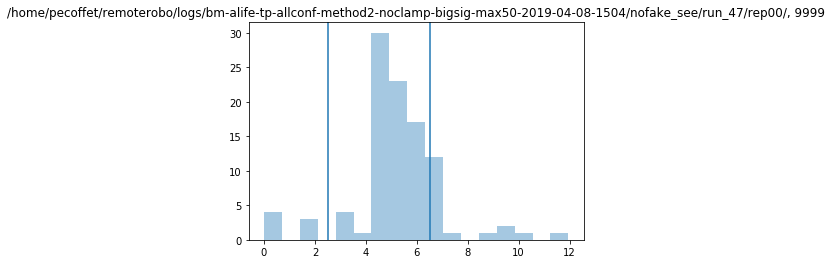

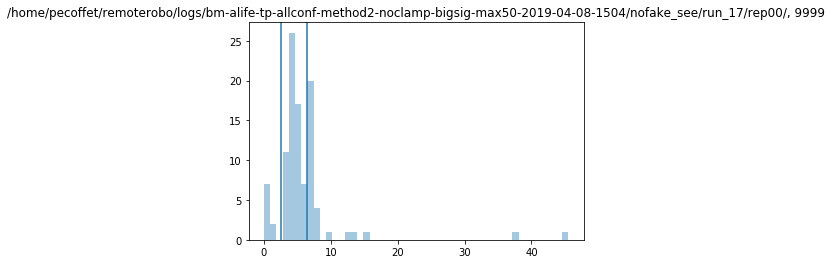

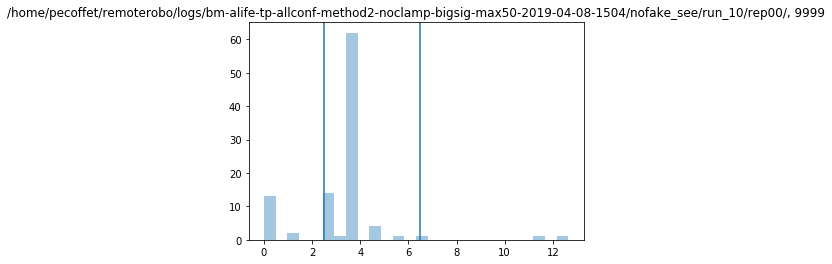

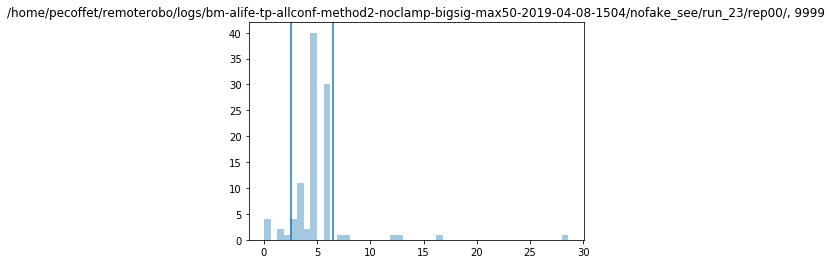

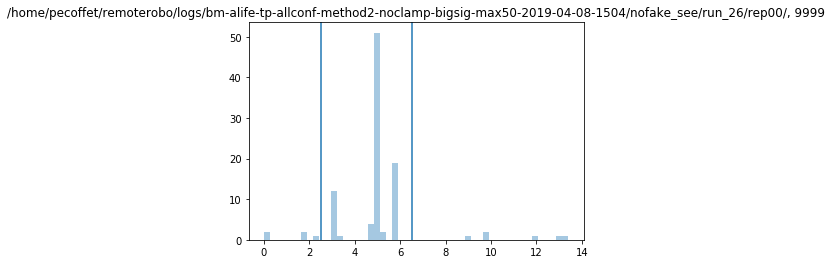

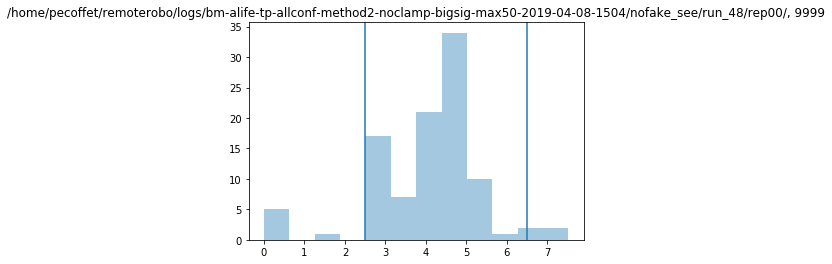

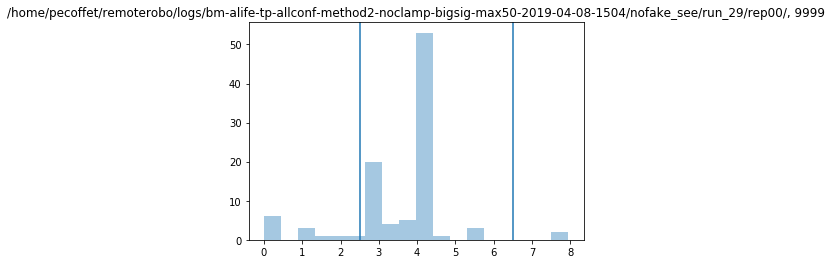

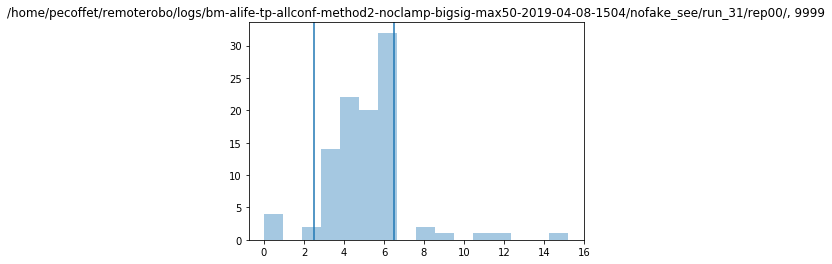

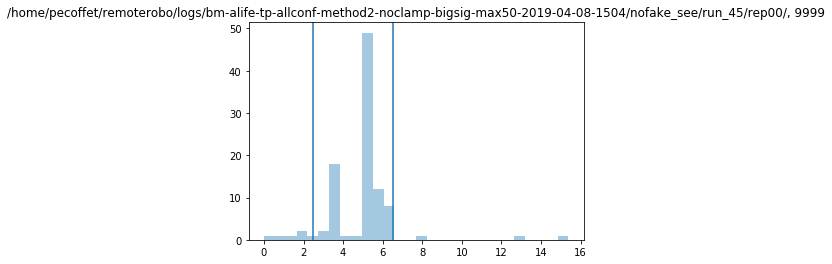

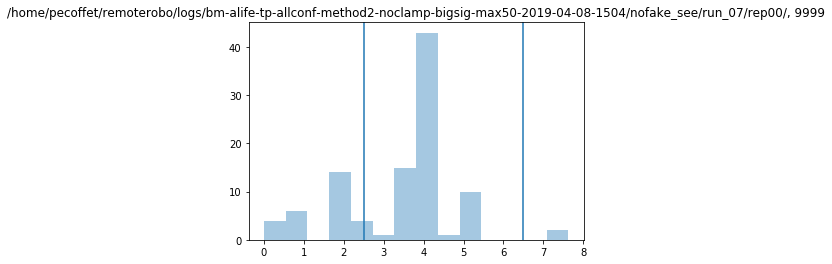

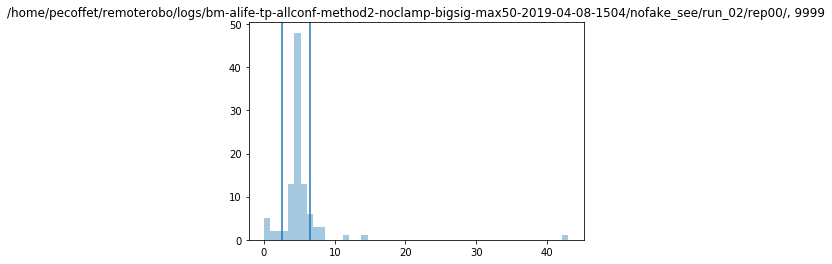

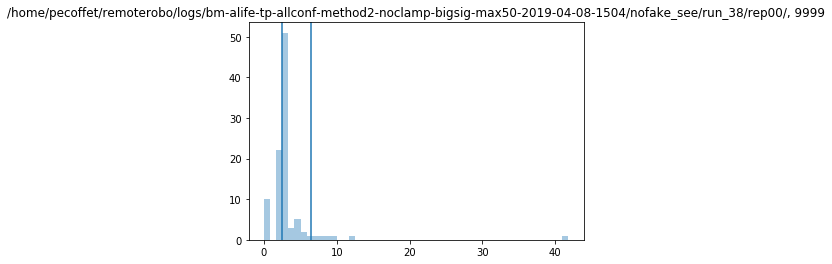

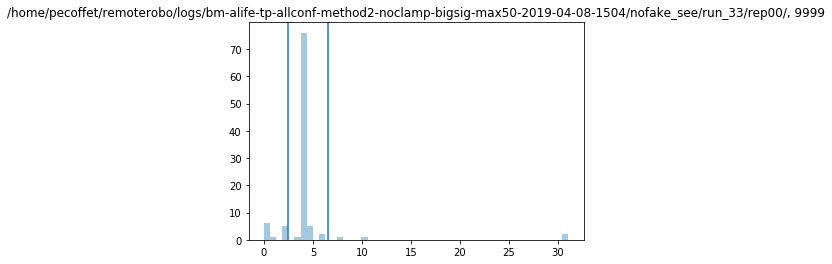

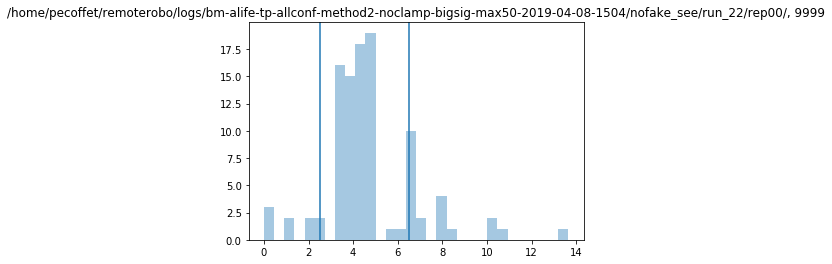

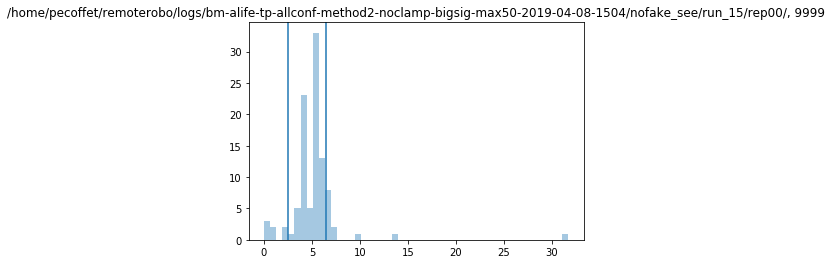

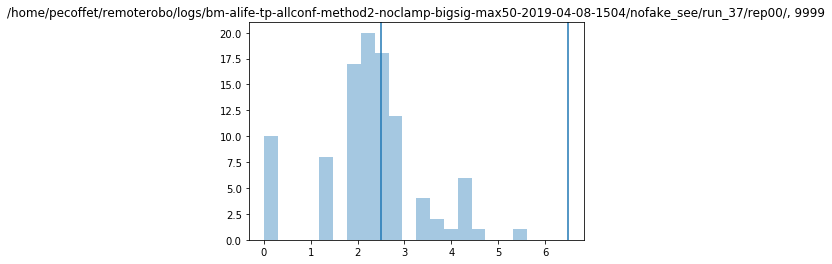

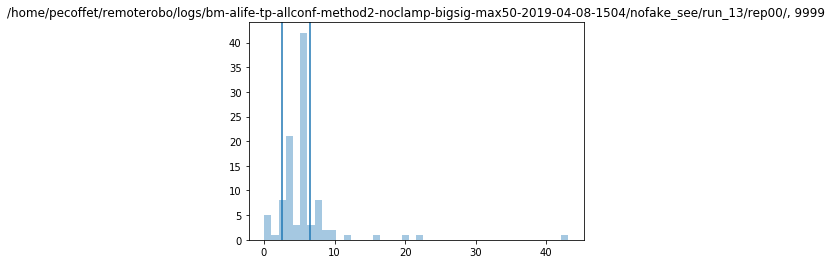

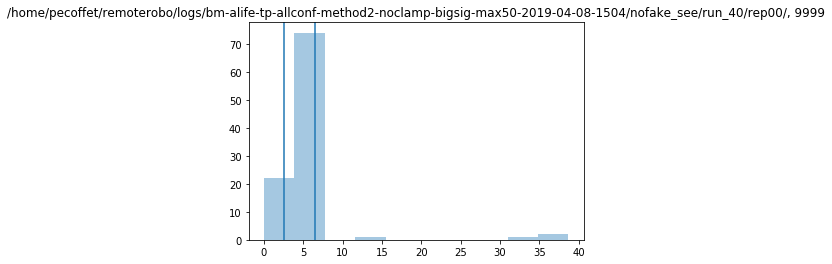

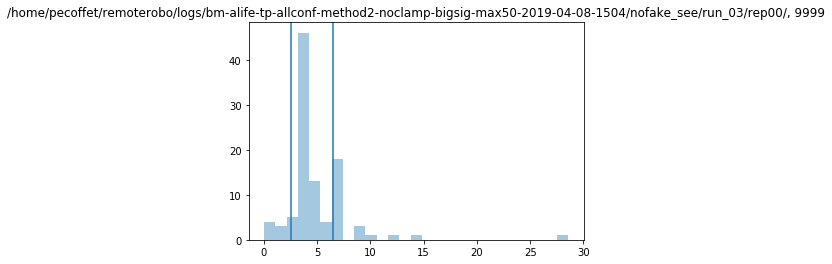

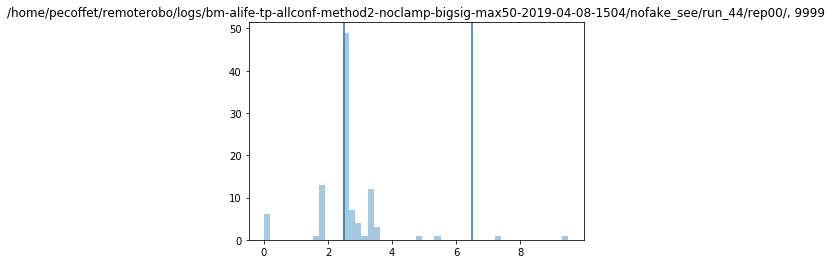

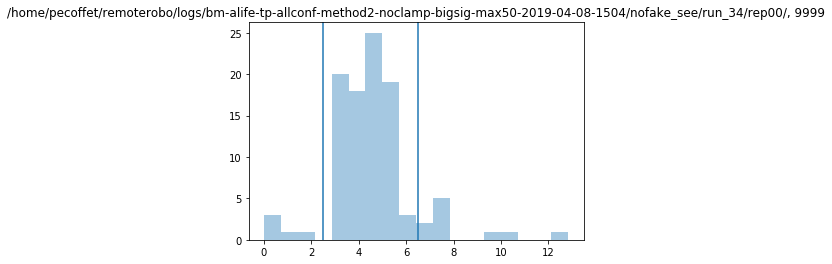

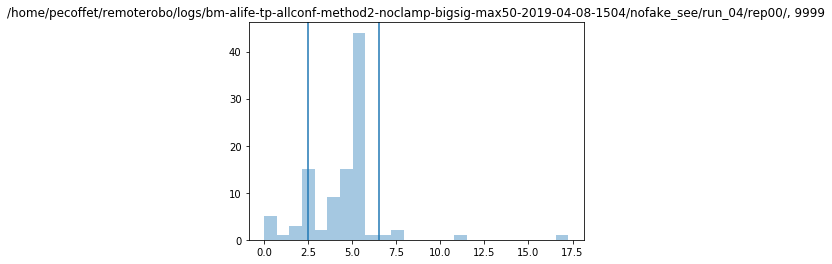

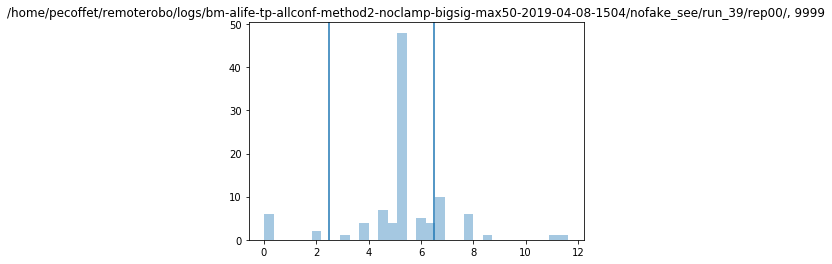

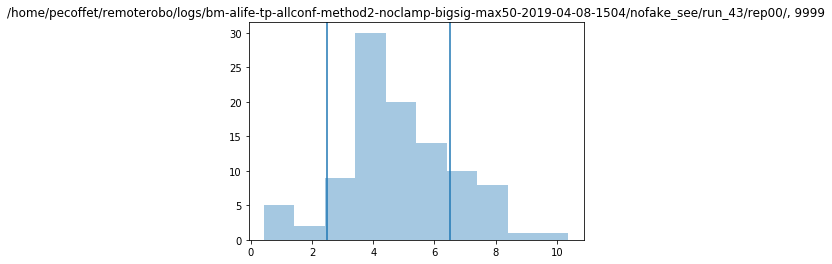

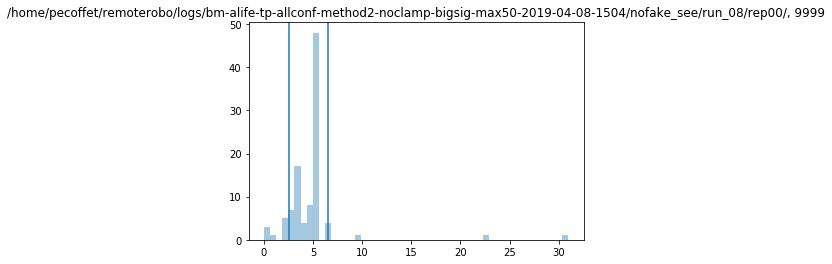

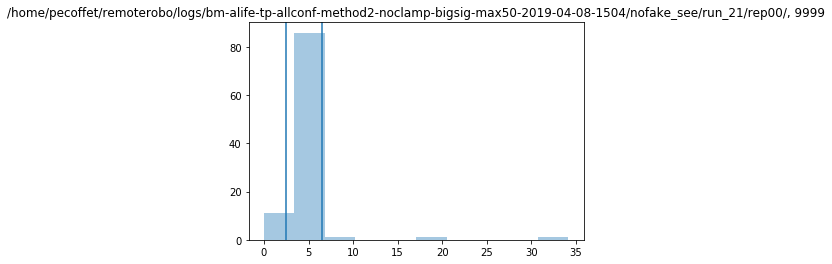

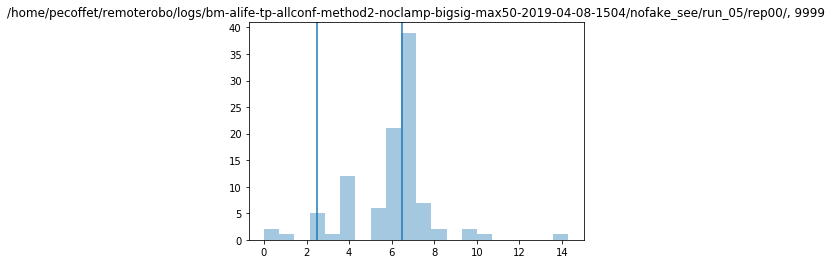

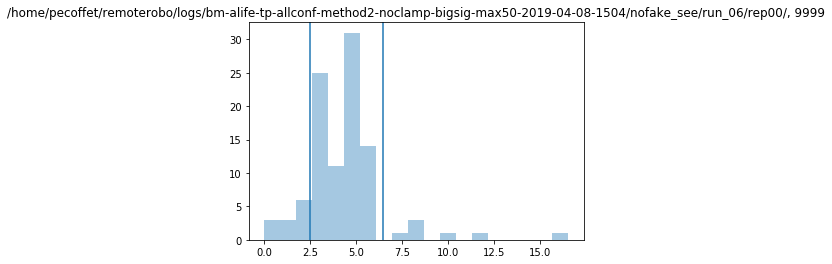

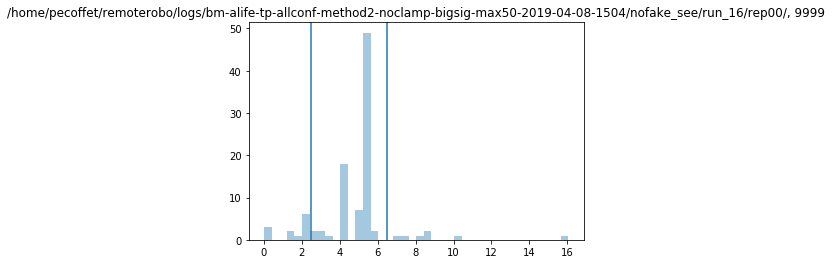

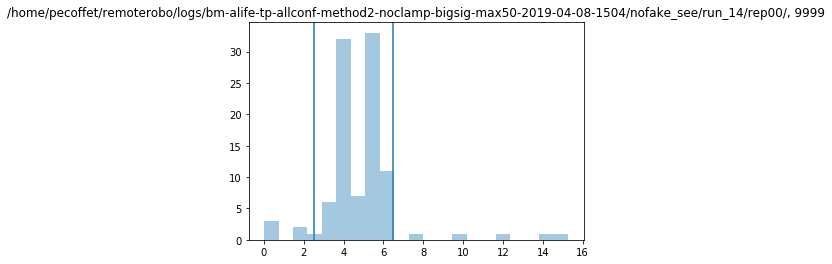

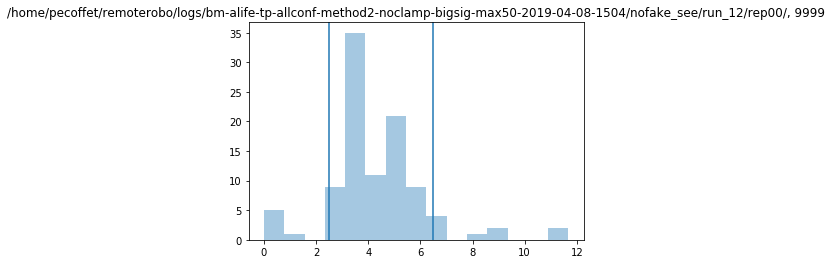

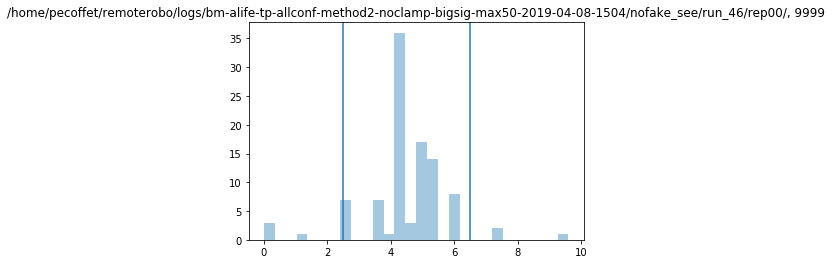

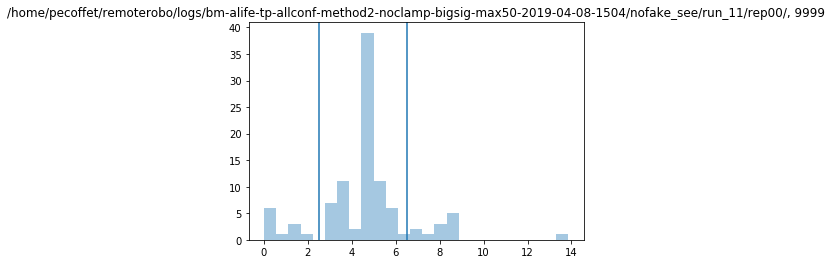

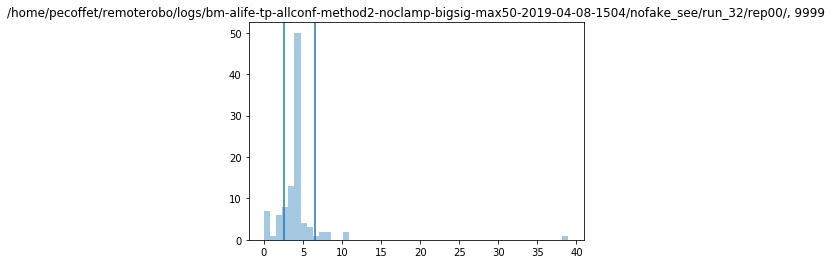

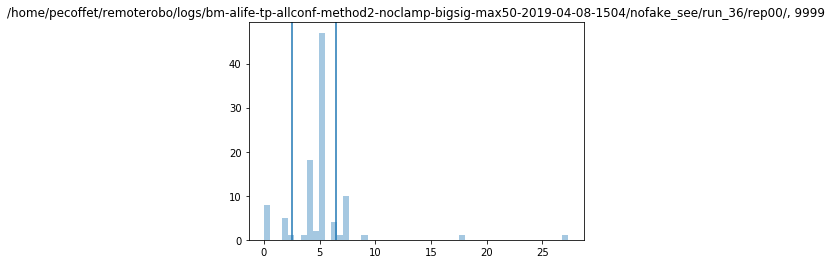

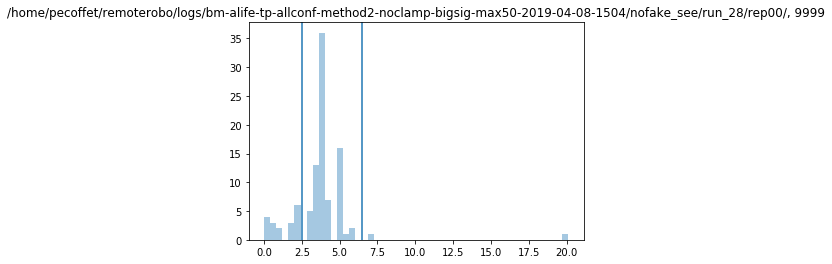

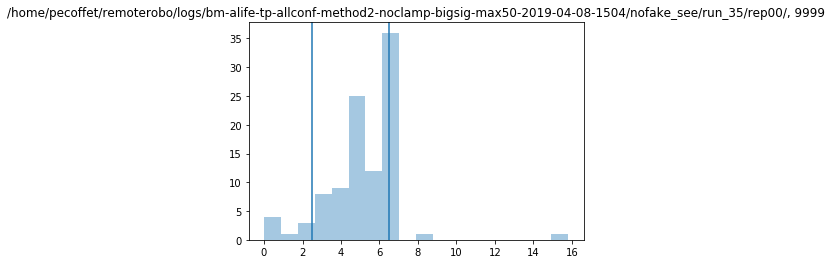

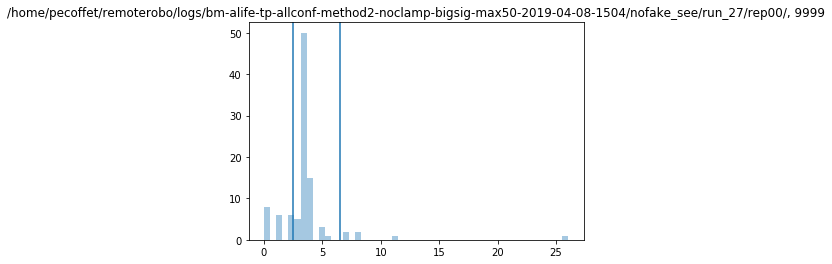

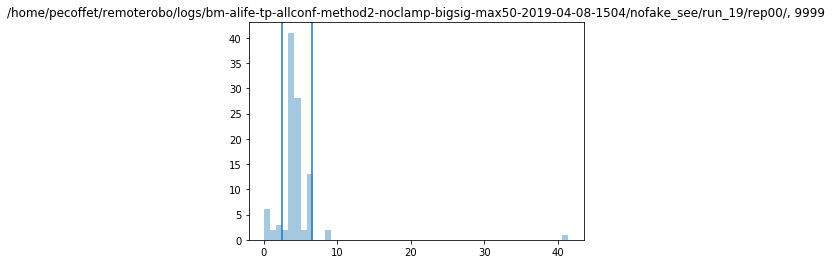

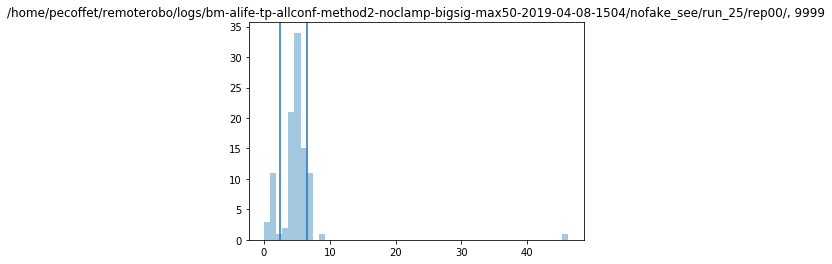

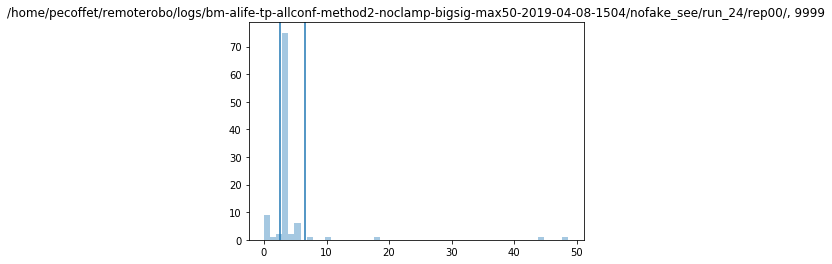

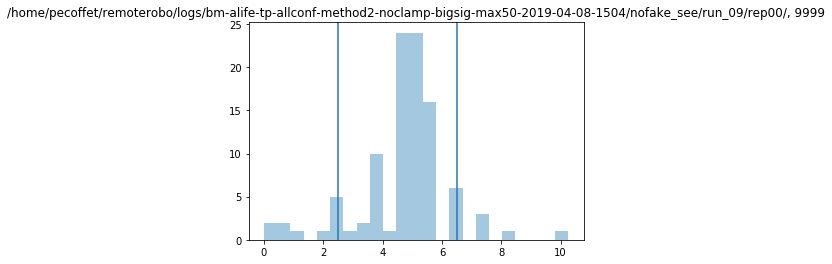

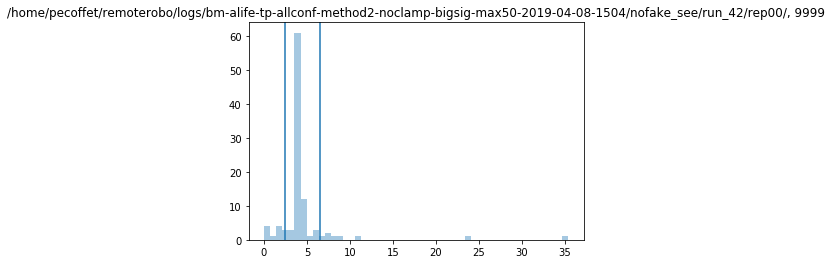

In [2]:
val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-*/**/rep00/'
vals = glob.glob(val, recursive=True)
for gen, name, generation in zip(loader.getgenomes(vals), vals, loader.getlastgen(vals)):
    fig = plt.figure()
    sns.distplot(gen, kde=False)
    #plt.xlim(0, 10)
    plt.axvline(2.5)
    plt.axvline(6.5)
    plt.title(name + ', ' + str(generation))
    plt.show(fig)
    plt.close(fig)

In [17]:
for fit in loader.getfitness([val]):
    sns.lineplot(x='gen', y='fitness', data=fit, ci=None)
    plt.ylim(0, None)
    

erreur, pas de run


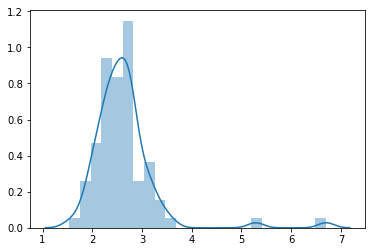

In [11]:
val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-bigmut-2019*/nofake_see/*/rep00/'
vals = glob.glob(val, recursive=True)
res = []
for gen, name, generation in zip(loader.getgenomes(vals), vals, loader.getlastgen(vals)):
    res.append(np.median(gen))
sns.distplot(res)

In [58]:
val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-*/*/*/rep00/'
#val = '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019*/fake_see/*/rep00/'
vals = glob.glob(val, recursive=True)
    
i = 0
res = []
for value in vals:
    for genome, generation in zip(loader.getgenomes([value], np.arange(249, 10000, 250)), np.arange(249, 10000, 250)):
        #print(generation)
        for gene in genome:
            res.append({'gene':gene, 'generation': generation, 'run': i})
    i += 1
    if i > 50: break
maxi = i

In [59]:
df = pd.DataFrame(res)

In [60]:
df

,gene,generation,run
0,0.872443,249,0
1,4.640835,249,0
2,2.818467,249,0
3,1.842556,249,0
4,1.421357,249,0
5,4.084268,249,0
6,4.265519,249,0
7,3.271767,249,0
8,4.146102,249,0
9,4.108365,249,0


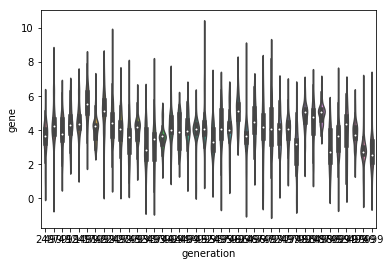

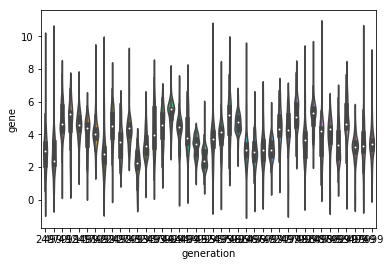

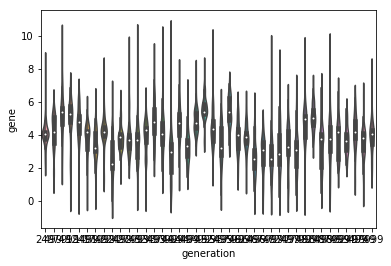

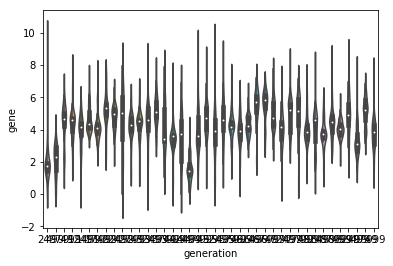

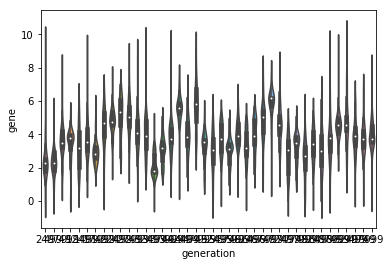

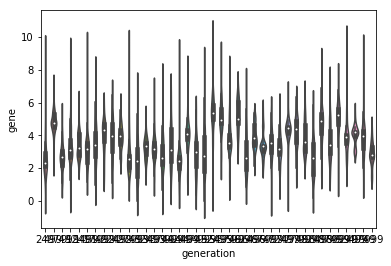

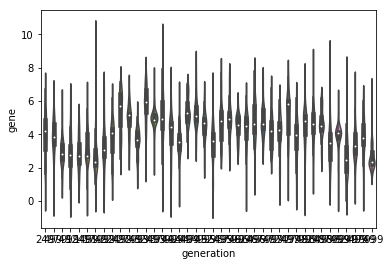

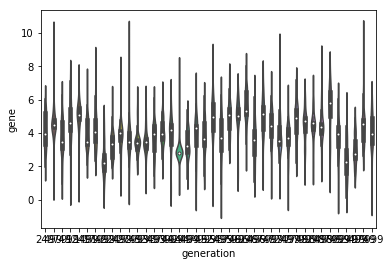

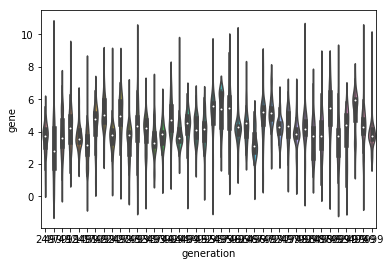

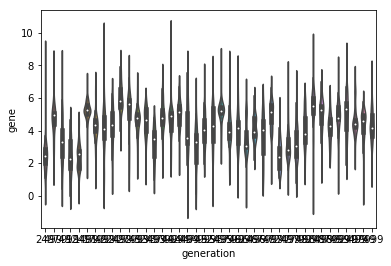

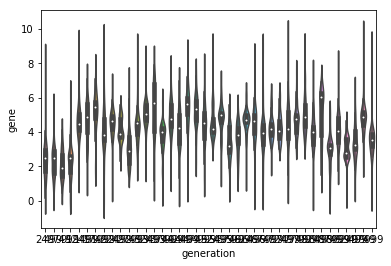

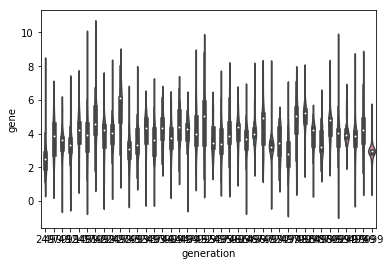

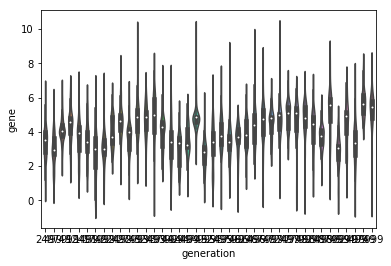

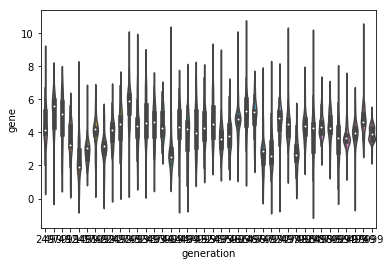

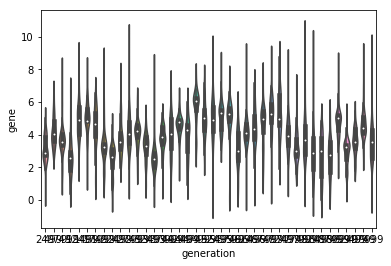

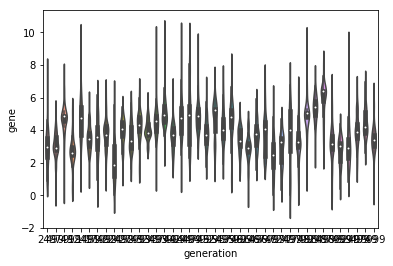

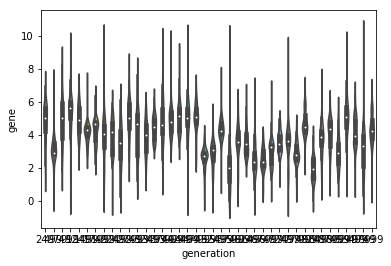

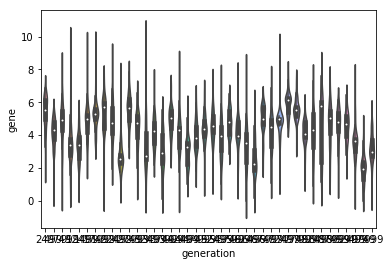

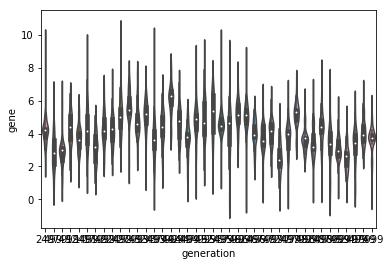

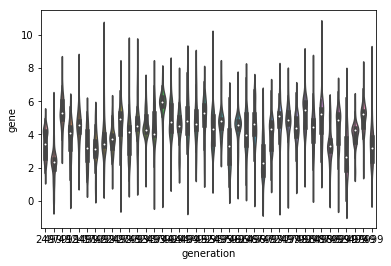

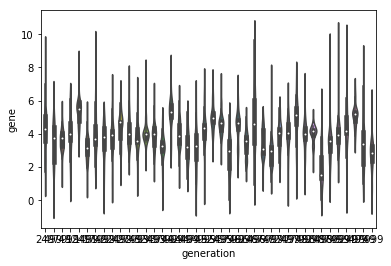

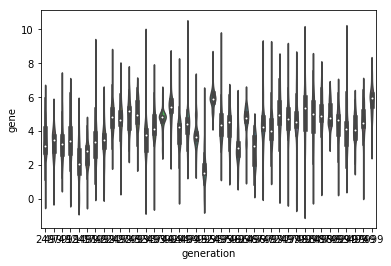

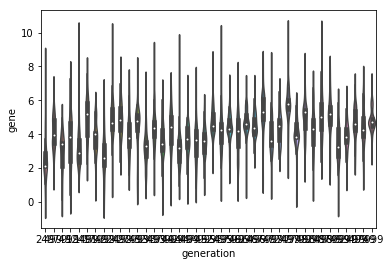

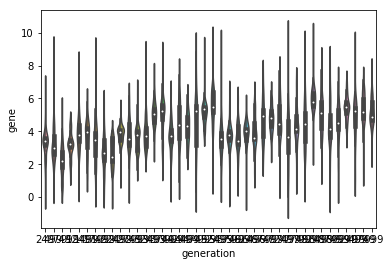

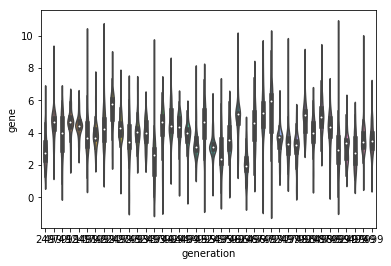

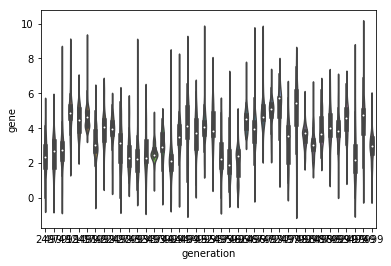

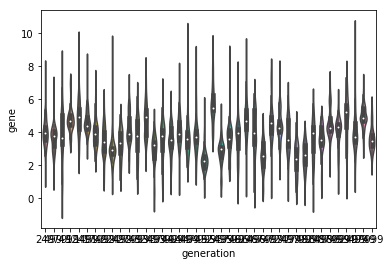

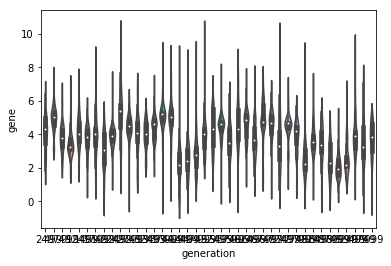

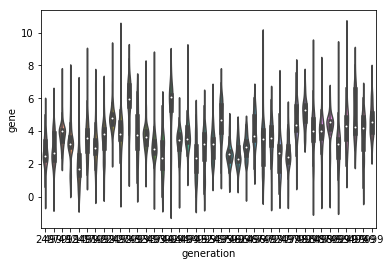

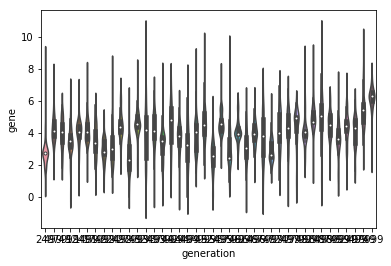

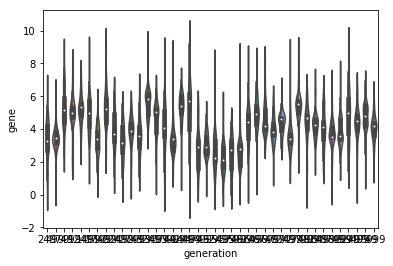

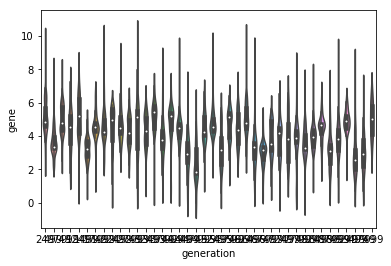

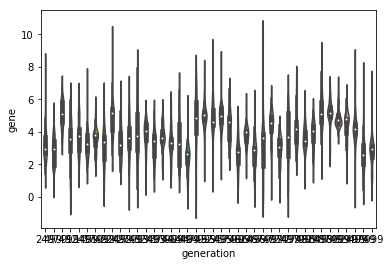

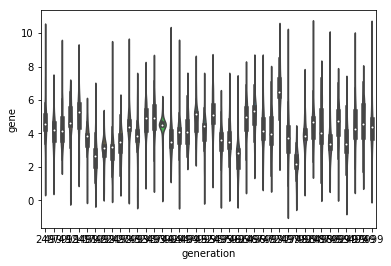

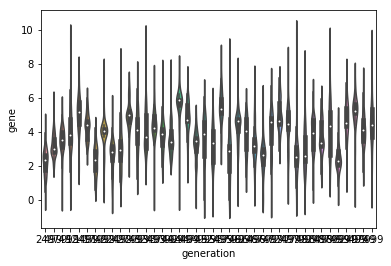

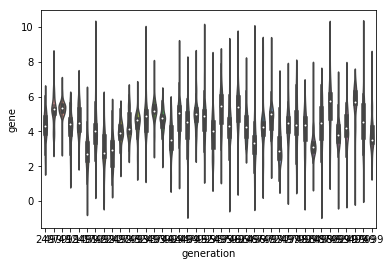

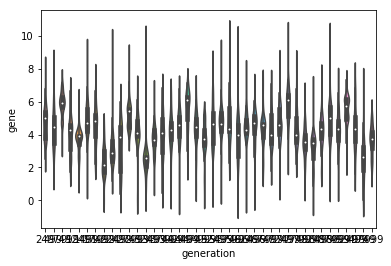

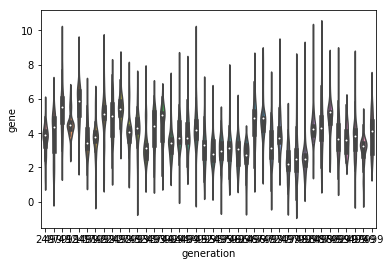

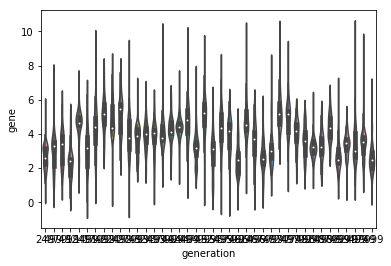

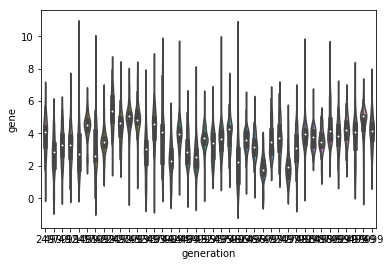

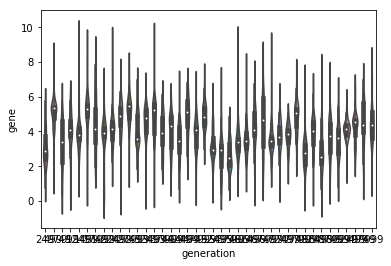

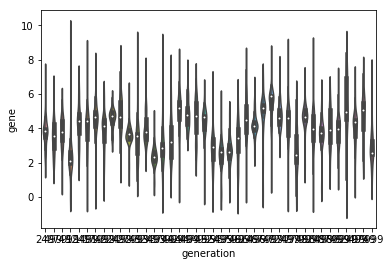

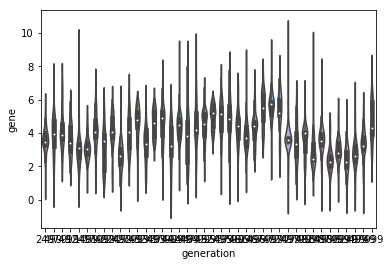

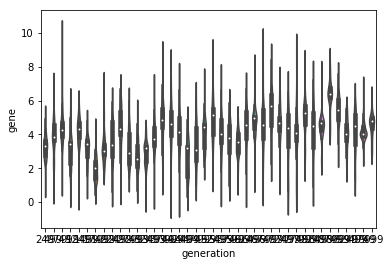

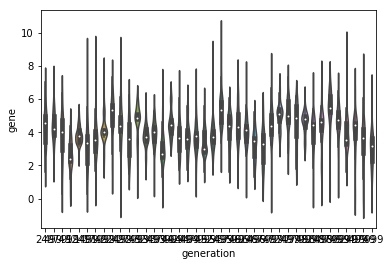

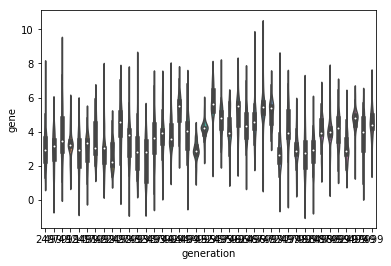

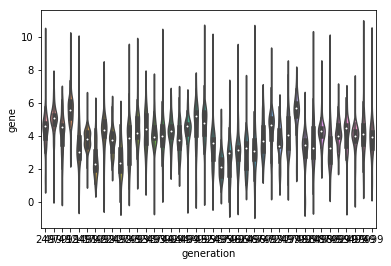

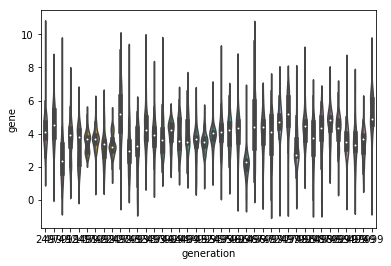

In [62]:
for currun in range(maxi):
    plt.figure()
    sns.violinplot(data=df.query(f'run == {currun}'), x='generation', y='gene')
    plt.show()